In [1]:
# 1. Dataset manipulation
import pandas as pd
from pandas import DataFrame
import numpy as np

# 2. Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# 3. Shuffling the data
import random
# 4. Scaling the data
from sklearn.preprocessing import StandardScaler
# 5. train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# 6. Machine learning model
# 1) Logistic regression
from sklearn.linear_model import LogisticRegression
# 2) Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# 3) Random Forest 
from sklearn.ensemble import RandomForestClassifier
# 4) Naive bayes
from sklearn.naive_bayes import GaussianNB 
# 5) K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
# 6) Neural Network
from sklearn.neural_network import MLPClassifier

# 7) Support Vector Machine (SVM) Algorithm
from sklearn.svm import SVC
# 8) XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# 9) Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
# 10) Stacking
import mlxtend
from mlxtend.classifier import StackingClassifier

# 7. test model
from sklearn import metrics

# 8. Evaluation
# 1) Accuracy score
from sklearn.metrics import accuracy_score
# 1) confusion_matrix
from sklearn.metrics import confusion_matrix
# 2) Classification_report
from sklearn.metrics import classification_report
# 3) ROC - AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder

<font color=black size=5 >4.Feature – Extracted Models<br/>         
<font color=black size=4 >**4.1 Split data into training and testing sets**<br/> 

In [2]:
df = pd.read_csv("0708df_sample.dat")

In [3]:
# leave 20% of data out for testing
X = df.drop('activityID',axis=1)
y = df['activityID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [4]:
X_train

heart rate   h_temp  h_acc_16X  h_acc_16Y  h_acc_16Z  h_acc_ma  h_gyroX  \
976      -0.8926  1.07400    -0.6514    -0.0240   0.109250   -0.2720 -0.04000   
4567     -1.4940  0.85550     0.9204     0.7340   0.843800   -0.2585 -0.02426   
1388     -0.4922  0.04462     0.8360     1.0940  -0.971000   -0.3518 -0.34130   
431      -0.9260  0.85550     0.1521    -1.4795   1.688000    0.3830 -0.17090   
2251      0.5430  0.29420    -0.2950     0.2087   0.462200   -0.4297 -1.82600   
...          ...      ...        ...        ...        ...       ...      ...   
1452     -0.1583  0.82400    -1.6750     1.1840   0.000753    2.0530 -1.72900   
1813      1.6780  0.38800    -2.1880     3.2010   0.612000    5.0600 -1.38600   
3902      0.9100 -0.39230    -3.5620     1.3950   1.213000    5.2270 -0.59100   
366      -0.2585  0.76200     0.3215    -0.8480   1.303000   -0.4717 -0.91260   
4022     -0.4922 -1.26600     0.2668     0.7380   0.670000   -0.2430  0.04416   

      h_gyroY  h_gyroZ  h_gyro_ma  ...  a_acc_16Y  a_acc_16Z  a_acc_ma  \
976  -0.05948  0.02747    -0.9863  ...    -0.1870    -0.3481   -0.3420   
4567 -0.06970 -0.00082    -1.0070  ...    -1.6860    -0.5215   -0.3018   
1388  0.21300 -0.04395    -0.7153  ...    -0.2832     0.6820   -0.3926   
431  -0.46880 -0.45800    -0.4807  ...     0.2627    -0.3408   -0.3777   
2251  2.05900  0.63400     0.9873  ...     1.7500     0.9614    1.5980   
...       ...      ...        ...  ...        ...        ...       ...   
1452 -0.51170 -2.26600     1.6820  ...    -1.2800     0.2449   -0.6490   
1813  1.41600  2.76400     2.1560  ...     1.4560    -1.0970    0.7550   
3902 -0.45040 -1.57200     0.6790  ...     2.0370     1.9730    2.4040   
366   1.57500 -0.16100     0.1998  ...     0.2224    -0.6543   -0.3762   
4022 -0.36330 -0.09430    -0.8154  ...    -0.1725     0.9930   -0.4090   

      a_gyro_ma   a_gyroX  a_gyroY  a_gyroZ  a_magY  a_magZ  a_mag_ma  
976     -0.7940  0.015590 -0.04580 -0.03870 -0.4550  0.9620   -0.7817  
4567    -0.7940  0.029950 -0.04288 -0.03250  1.1720 -1.0810   -1.0690  
1388    -0.7817 -0.008070  0.03595 -0.04105  1.5190 -3.6720    1.9795  
431     -0.7590 -0.027240  0.01531  0.00448 -0.8726 -0.9023   -0.1815  
2251     2.4960 -1.237000 -2.02100  2.82000  0.0940 -1.6140   -1.3870  
...         ...       ...      ...      ...     ...     ...       ...  
1452     0.4912 -2.309000 -0.53500  0.07970 -0.8154  0.6455   -0.0648  
1813     0.4734 -0.254400 -0.56500 -1.17000  0.3496  0.5874    0.1265  
3902     0.9130  1.025000  0.99700 -1.46900  1.8790 -0.1241    0.9320  
366     -0.5874  0.001818 -0.08093  0.16520 -0.5913 -0.3710   -1.8260  
4022    -0.7725  0.071800 -0.00942 -0.04437 -1.8125 -3.6560    2.6110  

[4000 rows x 35 columns]

<font color=black size=4 >**4.2 Feature Extraction with PCA**<br/>

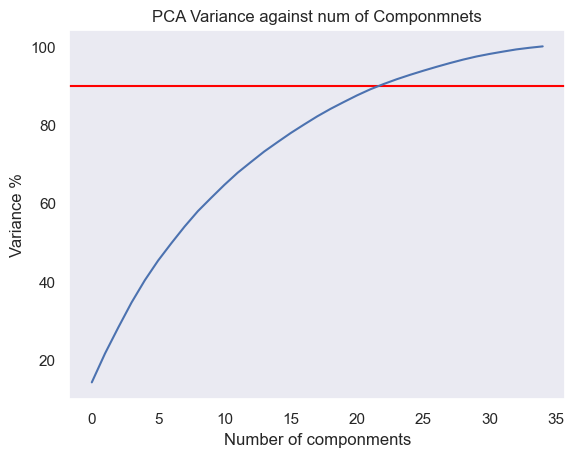

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(90, color="red")

plt.plot(var1)

plt.grid()

Text(0, 0.5, 'explained_variance_ratio_')

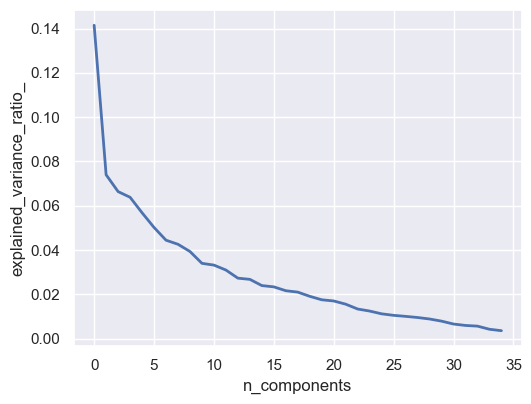

In [11]:
pca = PCA()
pca.fit(X_train)
#plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [12]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.80) + 1
print('The number of dimensions required to preserve 80% of variance is',dim)

pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.85) + 1
print('The number of dimensions required to preserve 85% of variance is',dim)

pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 80% of variance is 17
The number of dimensions required to preserve 85% of variance is 20
The number of dimensions required to preserve 90% of variance is 23


In [13]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
pca = PCA()
pca.fit(X_train)

feature_importances = np.abs(pca.components_[0])
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X.columns[sorted_indices]

result_pca = pd.DataFrame(columns=['Num Features', 'Features', 'Train Accuracy', 'Test Accuracy'])

knn = KNeighborsClassifier(n_neighbors=3)

for i in range(1, len(sorted_features) + 1):
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    train_accuracy = cross_val_score(knn, X_train_selected , y_train, cv=5).mean()
    test_accuracy = cross_val_score(knn, X_test_selected, y_test, cv=5).mean()

    result_pca.loc[i] = [i, ', '.join(selected_features), train_accuracy, test_accuracy]

result_pca

Num Features                                           Features  \
1              1                                         heart rate   
2              2                                 heart rate, c_magZ   
3              3                      heart rate, c_magZ, h_gyro_ma   
4              4           heart rate, c_magZ, h_gyro_ma, c_gyro_ma   
5              5  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
6              6  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
7              7  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
8              8  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
9              9  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
10            10  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
11            11  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
12            12  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
13            13  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
14            14  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
15            15  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
16            16  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
17            17  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
18            18  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
19            19  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
20            20  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
21            21  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
22            22  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
23            23  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
24            24  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
25            25  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
26            26  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
27            27  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
28            28  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
29            29  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
30            30  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
31            31  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
32            32  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
33            33  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
34            34  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   
35            35  heart rate, c_magZ, h_gyro_ma, c_gyro_ma, c_ac...   

    Train Accuracy  Test Accuracy  
1          0.34375          0.292  
2          0.56550          0.515  
3          0.58850          0.526  
4          0.58625          0.523  
5          0.66075          0.601  
6          0.70550          0.613  
7          0.71375          0.639  
8          0.75275          0.657  
9          0.77250          0.692  
10         0.78275          0.686  
11         0.80550          0.711  
12         0.84225          0.747  
13         0.85300          0.748  
14         0.86150          0.772  
15         0.86525          0.765  
16         0.86375          0.778  
17         0.85800          0.767  
18         0.86475          0.760  
19         0.86175          0.757  
20         0.86000          0.761  
21         0.86525          0.772  
22         0.87150          0.781  
23         0.86075          0.751  
24         0.85800          0.754  
25         0.86125          0.755  
26         0.85725          0.757  
27         0.84925          0.747  
28         0.85375          0.744  
29         0.85400          0.742  
30         0.85350          0.742  
31         0.85750          0.743  
32         0.85850          0.744  
33         0.86125          0.748  
34         0.85925          0.749  
35         0.85775          0.744

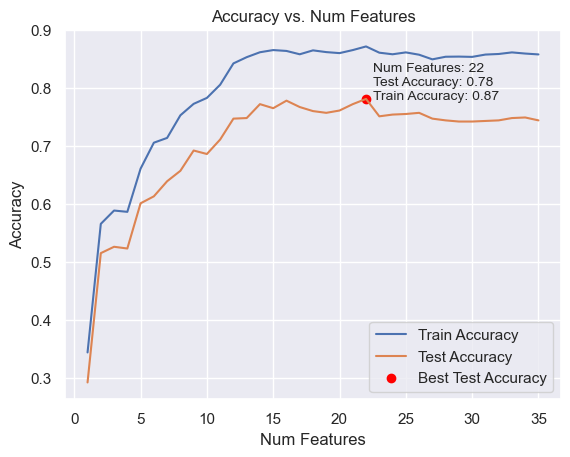

In [14]:
plt.plot(result_pca['Num Features'], result_pca['Train Accuracy'], label='Train Accuracy')
plt.plot(result_pca['Num Features'], result_pca['Test Accuracy'], label='Test Accuracy')
max_test_score = result_pca['Test Accuracy'].max()
Num_Features = result_pca.loc[result_pca['Test Accuracy'].idxmax(), 'Num Features']
best_train_score = result_pca.loc[result_pca['Test Accuracy'].idxmax(), 'Train Accuracy']
plt.scatter(Num_Features, max_test_score, color='red', label='Best Test Accuracy')

plt.annotate(f'Num Features: {Num_Features}\nTest Accuracy: {max_test_score:.2f}\nTrain Accuracy: {best_train_score:.2f}',
             (Num_Features + 0.5, max_test_score), fontsize=10)



plt.xlabel('Num Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Num Features')

plt.legend()

plt.show()

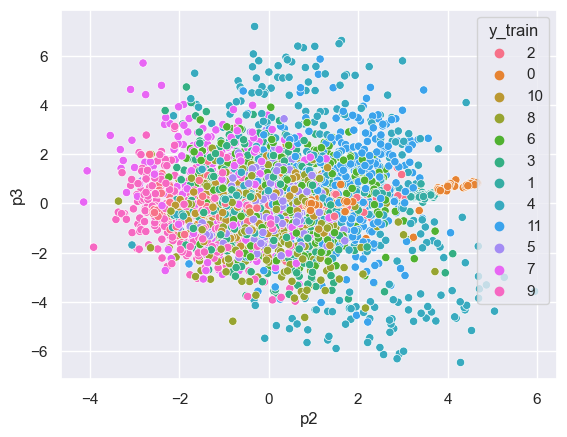

In [16]:
pca = PCA(n_components = 3)
pca.fit(X_train)
x_reduced_pca = pca.transform(X_train)
pca_data = pd.DataFrame(x_reduced_pca, columns = ["p1","p2", "p3"])
pca_data["y_train"] = y_train.reset_index().drop("index", axis = 1)
pca_data["y_train"] = pca_data["y_train"].astype(str)
# visualize PCA
sns.scatterplot(x = "p2", y = "p3", hue = "y_train", data = pca_data)
plt.show()

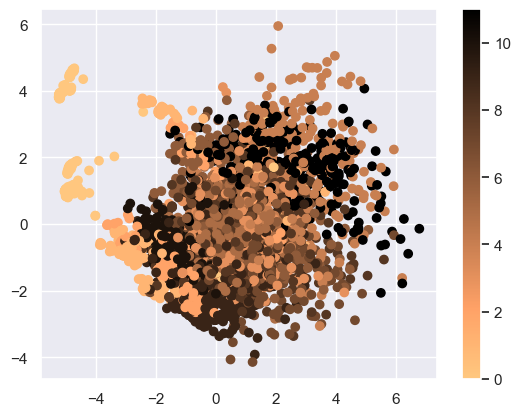

In [17]:
PCA_train_x = PCA(2).fit_transform(X_train)

plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], c=y_train, cmap="copper_r")
#plt.axis('off')
plt.colorbar()
plt.show()

<font color=black size=4 >**4.3 Logistic Regression**<br/> 
    
<font color=black size=3 > **1. Feature Selection**<br/>
<font color=black size=2 >1) **AIC - Forward**: Using AIC (Akaike Information Criteria) for forward feature selection,and calculate the average accuracy and average log loss of cross-validation(cv=5). <br/> 
 &emsp;**Summary**: As number of features increased, the cross-validated log-loss decreased and the cross-validated accuracy increased. The full model which contains the all of features has the highest arruracy and lowest log-loss, but highest AIC and BIC values. It is hard to estimate which feature set is better than others.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, log_loss

logreg = LogisticRegression(solver='saga', max_iter=1000)

# Define a function to compute AIC, BIC value
def compute_aic_bic(y_true, y_pred, num_features, num_samples):
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    aic = 2 * num_features - 2 * np.log(rss)
    bic = np.log(num_samples) * num_features - 2 * np.log(rss)
    return aic, bic
# Initialize variables to store selected features and corresponding AIC, BIC values
selected_features = []
best_aic = np.inf
best_bic = np.inf
best_score = -np.inf
results = []

while len(selected_features) < X_train.shape[1]: 

    aic_values = [] 
    
    for feature in X.columns:
        if feature not in selected_features:
            features_subset = selected_features + [feature]
            X_subset = X_train[features_subset]
            logreg.fit(X_subset, y_train)

            # Use cross-validation to calculate the log loss
            scoring = ['accuracy', 'neg_log_loss']
            scores = cross_validate(logreg, X_subset, y_train, cv=5, scoring=scoring)
            mean_accuracy = np.mean(scores['test_accuracy'])
            mean_log_loss = -np.mean(scores['test_neg_log_loss'])

            # AIC, BIC
            aic, bic = compute_aic_bic(y_train, logreg.predict(X_subset), len(features_subset), len(y_train))

            # Accuracy
            # y_pred = logreg.predict(X_subset)
            # accuracy = accuracy_score(y_train, y_pred)

            aic_values.append((feature, aic, bic, mean_log_loss, mean_accuracy))

    #  Select the feature with the minimum AIC value
    best_feature, best_aic, best_bic, best_score, best_accuracy = min(aic_values, key=lambda x: x[1])

    selected_features.append(best_feature)

    result = (selected_features.copy(), best_aic, best_bic, best_score, best_accuracy)
    results.append(result)

    print("Selected features: ", selected_features)
    print("AIC value: ", best_aic)
    print("BIC valuue: ", best_bic)
    print("accuracy: ", best_accuracy)
    print("Cross-validation log loss: ", best_score)
    print("------")

print("best_feature: ", selected_features)
results_df = pd.DataFrame(results, columns=['Features', 'AIC', 'BIC', 'Log Loss', 'Accuracy'])
print(results_df)

Selected features:  ['h_acc_16Y']
AIC value:  -21.47552715940101
BIC valuue:  -15.181477519298983
accuracy:  0.10575000000000001
Cross-validation log loss:  2.4800317167916655
------
Selected features:  ['h_acc_16Y', 'a_magY']
AIC value:  -19.46182348073866
BIC valuue:  -6.873724200534603
accuracy:  0.14350000000000002
Cross-validation log loss:  2.421527581676185
------
Selected features:  ['h_acc_16Y', 'a_magY', 'h_acc_ma']
AIC value:  -17.442868903035663
BIC valuue:  1.4392800172704199
accuracy:  0.1465
Cross-validation log loss:  2.4000190345120163
------
Selected features:  ['h_acc_16Y', 'a_magY', 'h_acc_ma', 'h_gyroZ']
AIC value:  -15.423569040806225
BIC valuue:  9.752629519601886
accuracy:  0.14375
Cross-validation log loss:  2.400133878811532
------
Selected features:  ['h_acc_16Y', 'a_magY', 'h_acc_ma', 'h_gyroZ', 'a_gyroZ']
AIC value:  -13.392176668856163
BIC valuue:  18.07807153165398
accuracy:  0.14675
Cross-validation log loss:  2.400329976624164
------
Selected features: 

In [6]:
# Add the number of features
results_df['Number of features'] = range(1, len(results_df) + 1)
results_df

Features        AIC         BIC  \
0                                         [h_acc_16Y] -21.475527  -15.181478   
1                                 [h_acc_16Y, a_magY] -19.461823   -6.873724   
2                       [h_acc_16Y, a_magY, h_acc_ma] -17.442869    1.439280   
3              [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ] -15.423569    9.752630   
4     [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ] -13.392177   18.078072   
5   [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ... -11.338781   26.425517   
6   [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  -9.264029   34.794319   
7   [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  -7.198445   43.153952   
8   [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  -5.133520   51.512927   
9   [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  -3.064848   59.875648   
10  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  -0.957082   68.277464   
11  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...   1.084160   76.612756   
12  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...   3.140391   84.963036   
13  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...   5.172177   93.288872   
14  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...   7.213699  101.624444   
15  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...   9.244827  109.949621   
16  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  11.380071  118.378915   
17  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  13.306565  126.599459   
18  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  15.549140  135.136083   
19  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  17.736699  143.617692   
20  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  19.957241  152.132284   
21  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  22.226547  160.695639   
22  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  24.482705  169.245847   
23  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  26.763354  177.820546   
24  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  28.952894  186.304135   
25  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  31.073393  194.718684   
26  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  33.202291  203.141632   
27  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  35.362656  211.596046   
28  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  37.424474  219.951913   
29  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  39.720274  228.541763   
30  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  41.973523  237.089062   
31  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  44.265731  245.675319   
32  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  46.849894  254.553532   
33  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  49.259338  263.257026   
34  [h_acc_16Y, a_magY, h_acc_ma, h_gyroZ, a_gyroZ...  52.072400  272.364137   

    Log Loss  Accuracy  Number of features  
0   2.480032   0.10575                   1  
1   2.421528   0.14350                   2  
2   2.400019   0.14650                   3  
3   2.400134   0.14375                   4  
4   2.400330   0.14675                   5  
5   2.395205   0.15750                   6  
6   2.389348   0.15875                   7  
7   2.385658   0.16750                   8  
8   2.351064   0.18275                   9  
9   2.337730   0.19100                  10  
10  2.259834   0.20700                  11  
11  2.250700   0.21075                  12  
12  2.247403   0.21825                  13  
13  2.221483   0.22850                  14  
14  2.180834   0.24800                  15  
15  2.157752   0.26025                  16  
16  2.114783   0.29850                  17  
17  2.007519   0.31875                  18  
18  1.977746   0.32650                  19  
19  1.965765   0.35475                  20  
20  1.878292   0.38900                  21  
21  1.836190   0.40875                  22  
22  1.706612   0.45150                  23  
23  1.631650   0.47825                  24  
24  1.502440   0.52350                 

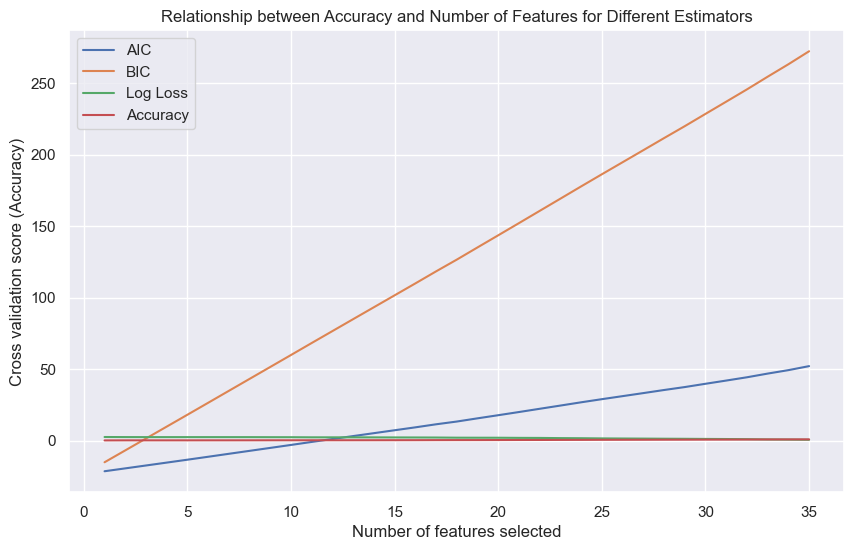

In [7]:
# Plot to see which feature set is better
plt.figure(figsize=(10, 6))
columns = ['AIC', 'BIC', 'Log Loss', 'Accuracy']
for col in columns:
    plt.plot(results_df['Number of features'], results_df[col], label=col)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (Accuracy)")
plt.title("Relationship between Accuracy and Number of Features for Different Estimators")
plt.legend()
plt.show()

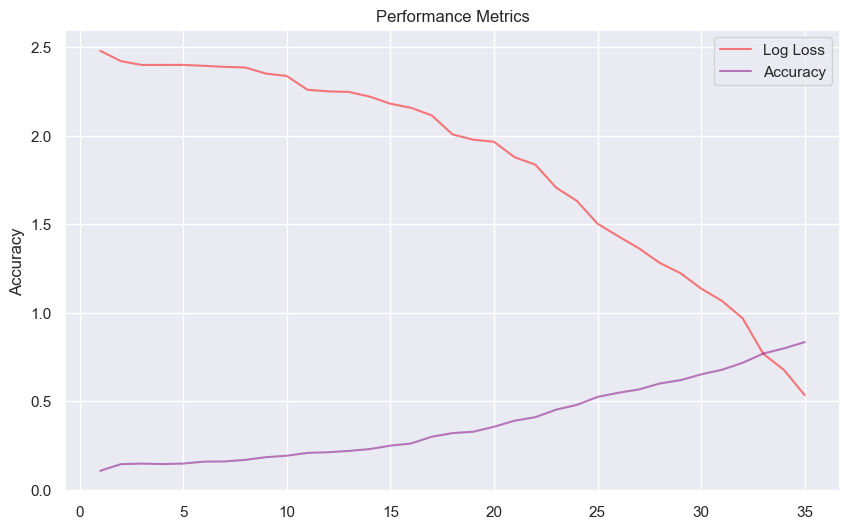

In [8]:
fig, ax2= plt.subplots(figsize=(10, 6))
# Plot Log Loss as bars
ax2.plot(results_df['Number of features'], results_df['Log Loss'], color='red', alpha=0.5, label='Log Loss')
ax2.set_ylabel('Log Loss')

# Plot Accuracy as bars
ax2.plot(results_df['Number of features'], results_df['Accuracy'], color='purple', alpha=0.5, label='Accuracy')
ax2.set_ylabel('Accuracy')

# Set title and legend
ax2.set_title('Performance Metrics')
ax2.legend()

plt.show()

<font color=black size=2 >2) **AIC - Backward**: Using AIC (Akaike Information Criteria) for backward feature selection,and calculate the average accuracy and average log loss of cross-validation(cv=5). <br/>
 &emsp;**Summary**: As number of features increased, the cross-validated log-loss decreased and the cross-validated accuracy increased. The full model which contains the all of features has the highest arruracy and lowest log-loss, but highest AIC and BIC values. It is hard to estimate which feature set is better than others.

In [9]:
def compute_aic_bic(y_true, y_pred, num_features, num_samples):
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    aic = 2 * num_features - 2 * np.log(rss)
    bic = np.log(num_samples) * num_features - 2 * np.log(rss)
    return aic, bic
selected_features = list(X_train.columns)
results = []

while len(selected_features) > 0:
    aic_values = []

    for feature in selected_features:
        features_subset = selected_features.copy()
        features_subset.remove(feature)
        X_subset = X_train[features_subset]

        logreg.fit(X_subset, y_train)

        # Use cross-validation to calculate the log loss
        scoring = ['accuracy', 'neg_log_loss']
        cv_results = cross_validate(logreg, X_subset, y_train, cv=5, scoring=scoring)
        mean_accuracy = np.mean(cv_results['test_accuracy'])
        mean_log_loss = -np.mean(cv_results['test_neg_log_loss'])

        # AIC, BIC
        logreg.fit(X_subset, y_train)
        y_pred = logreg.predict(X_subset)
        num_samples = len(y_train)
        aic, bic = compute_aic_bic(y_train, logreg.predict(X_subset), len(features_subset), len(y_train))

        aic_values.append((feature, aic, bic, mean_log_loss, mean_accuracy))

    # Select the feature with the maximum AIC value
    worst_feature, worst_aic, worst_bic, mean_logloss, mean_accuracy = max(aic_values, key=lambda x: x[1])

    selected_features.remove(worst_feature)

    result = (selected_features.copy(), worst_aic, worst_bic, mean_logloss, mean_accuracy)
    results.append(result)

    print("Selected features: ", selected_features)
    print("AIC value: ", worst_aic)
    print("BIC value: ", worst_bic)
    print("Log loss: ", mean_logloss)
    print("Accuracy: ", mean_accuracy)
    print("------")

Selected features:  ['heart rate', 'h_temp', 'h_acc_16X', 'h_acc_16Y', 'h_acc_16Z', 'h_acc_ma', 'h_gyroX', 'h_gyroY', 'h_gyroZ', 'h_gyro_ma', 'h_magX', 'h_magZ', 'c_acc_16X', 'c_acc_16Z', 'c_acc_ma', 'c_gyroX', 'c_gyroY', 'c_gyroZ', 'c_gyro_ma', 'c_magX', 'c_magY', 'c_magZ', 'c_mag_ma', 'a_temp', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma', 'a_gyro_ma', 'a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_magY', 'a_magZ', 'a_mag_ma']
AIC value:  50.124512126115114
BIC value:  264.12219988958407
Log loss:  0.5441988143695001
Accuracy:  0.83475
------
Selected features:  ['heart rate', 'h_temp', 'h_acc_16X', 'h_acc_16Y', 'h_acc_16Z', 'h_acc_ma', 'h_gyroX', 'h_gyroY', 'h_gyroZ', 'h_gyro_ma', 'h_magX', 'h_magZ', 'c_acc_16X', 'c_acc_16Z', 'c_acc_ma', 'c_gyroX', 'c_gyroY', 'c_gyroZ', 'c_gyro_ma', 'c_magY', 'c_magZ', 'c_mag_ma', 'a_temp', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma', 'a_gyro_ma', 'a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_magY', 'a_magZ', 'a_mag_ma']
AIC value:  48.1739761550548
BIC value:  255.8776142784217
Log l

ValueError: at least one array or dtype is required

In [21]:
results_back = pd.DataFrame(results, columns=['Features', 'AIC', 'BIC', 'Log Loss', 'Accuracy'])
results_back['Number of features'] =range(34, 34 - len(results_back), -1)
results_back

Features        AIC         BIC  \
0   [heart rate, h_temp, h_acc_16X, h_acc_16Y, h_a...  50.124512  264.122200   
1   [heart rate, h_temp, h_acc_16X, h_acc_16Y, h_a...  48.173976  255.877614   
2   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  46.251384  247.660972   
3   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  44.350056  239.465595   
4   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  42.320867  231.142356   
5   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  40.358897  222.886336   
6   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  38.314791  214.548181   
7   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  36.307870  206.247210   
8   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  34.309886  197.955177   
9   [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  32.300398  189.651639   
10  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  30.212031  181.269222   
11  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  28.187755  172.950897   
12  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  26.141394  164.610486   
13  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  24.071120  156.246163   
14  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  22.039656  147.920648   
15  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  19.969647  139.556590   
16  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_a...  17.900361  131.193255   
17  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_g...  15.816661  122.815505   
18  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_g...  13.729844  114.434638   
19  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_g...  11.643126  106.053871   
20  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_g...   9.630570   97.747265   
21  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_m...   7.612798   89.435443   
22  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_m...   5.464103   80.992698   
23  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_m...   3.377639   72.612185   
24  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_m...   1.178505   64.119002   
25  [heart rate, h_temp, h_acc_16X, h_acc_16Z, h_m...  -0.960430   55.686017   
26  [heart rate, h_temp, h_acc_16X, h_magX, c_magY...  -3.138126   47.214271   
27  [heart rate, h_temp, h_magX, c_magY, c_magZ, a...  -5.323596   38.734751   
28  [heart rate, h_temp, h_magX, c_magY, a_temp, a...  -7.500906   30.263392   
29    [heart rate, h_temp, c_magY, a_temp, a_gyro_ma]  -9.783842   21.686406   
30               [heart rate, h_temp, c_magY, a_temp] -12.066486   13.109712   
31                       [heart rate, h_temp, a_temp] -14.748981    4.133168   
32                               [heart rate, h_temp] -17.227475   -4.639376   
33                                       [heart rate] -20.064353  -13.770303   

    Log Loss  Accuracy  Number of features  
0   0.544199   0.83475                  34  
1   0.561963   0.82950                  33  
2   0.573651   0.82225                  32  
3   0.572305   0.82150                  31  
4   0.570240   0.82300                  30  
5   0.569275   0.82350                  29  
6   0.571266   0.82375                  28  
7   0.574762   0.82150                  27  
8   0.580378   0.82350                  26  
9   0.581138   0.82225                  25  
10  0.581326   0.82000                  24  
11  0.581156   0.82050                  23  
12  0.580332   0.82050                  22  
13  0.590715   0.81550                  21  
14  0.594553   0.81225                  20  
15  0.594564   0.81175                  19  
16  0.619157   0.81000                  18  
17  0.637094   0.79700                  17  
18  0.640455   0.79575                  16  
19  0.664700   0.79400                  15  
20  0.676230   0.78850                  14  
21  0.691658   0.78475                  13  
22  0.714502   0.77775                  12  
23  0.732742   0.76400                  11  
24  0.747562   0.75675                  10  
25  0.792260   0.73325                   9  
26  0.854346   0.70850       

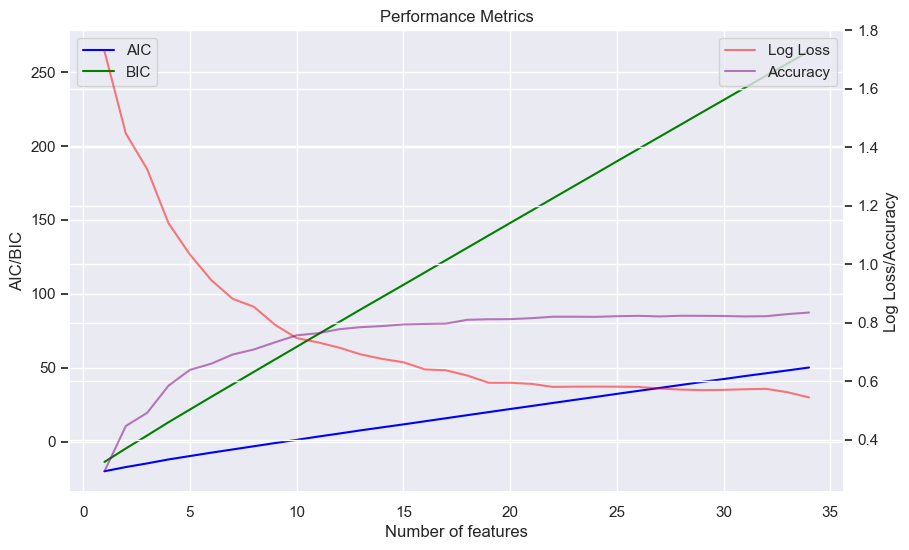

In [22]:
fig, ax1= plt.subplots(figsize=(10, 6))

# Plot AIC and BIC as lines
ax1.plot(results_back['Number of features'], results_back['AIC'], color='blue', label='AIC')
ax1.plot(results_back['Number of features'], results_back['BIC'], color='green', label='BIC')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('AIC/BIC')
ax1.legend()

# Create a second y-axis for Log Loss and Accuracy
ax2 = ax1.twinx()

# Plot Log Loss as bars
ax2.plot(results_back['Number of features'], results_back['Log Loss'], color='red', alpha=0.5, label='Log Loss')
ax2.set_ylabel('Log Loss')

# Plot Accuracy as bars
ax2.plot(results_back['Number of features'], results_back['Accuracy'], color='purple', alpha=0.5, label='Accuracy')
ax2.set_ylabel('Log Loss/Accuracy')

# Set title and legend
ax2.set_title('Performance Metrics')
ax2.legend()
plt.show()

<font color=black size=2 >3) **Feature Selection - RFE**<br/>
&emsp;Using RFE （Recursive Feature Elimination）for  feature selection,and calculate the average accuracy and average log loss of cross-validation(cv=5).

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, log_loss

logreg = LogisticRegression(solver='saga', max_iter=1000)
def compute_aic_bic(y_true, y_pred, num_features, num_samples):
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    aic = 2 * num_features - 2 * np.log(rss)
    bic = np.log(num_samples) * num_features - 2 * np.log(rss)
    return aic, bic

results_rfe = []
for num_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(logreg, n_features_to_select=num_features)
    X_subset = rfe.fit_transform(X_train, y_train)
    scoring = ['accuracy', 'neg_log_loss']
    cv_results = cross_validate(logreg, X_subset, y_train, cv=5, scoring=scoring)
    mean_accuracy = np.mean(cv_results['test_accuracy'])
    mean_log_loss = -np.mean(cv_results['test_neg_log_loss'])
    features = list(X_train.columns[rfe.support_])
    logreg.fit(X_subset, y_train)
    y_pred = logreg.predict(X_subset)
    num_samples = len(y_train)
    aic, bic = compute_aic_bic(y_train, y_pred, num_features, num_samples)

    result = (num_features, features, mean_accuracy, mean_log_loss, aic, bic)
    results_rfe.append(result)
    print("Selected features: ", features)
    print("Accuracy: ", mean_accuracy)
    print("Cross-validation log loss: ", mean_log_loss)
    print("AIC: ", aic)
    print("BIC: ", bic)
results_rfe = pd.DataFrame(results_rfe, columns=['Number of features', 'Features', 'Accuracy', 'Log Loss', 'AIC', 'BIC'])

Selected features:  ['heart rate']
Accuracy:  0.2915
Cross-validation log loss:  1.7287970737584328
AIC:  -20.064352617573412
BIC:  -13.770302977471385
Selected features:  ['heart rate', 'a_gyro_ma']
Accuracy:  0.38900000000000007
Cross-validation log loss:  1.5997574449929022
AIC:  -17.53823273921611
BIC:  -4.950133459012054
Selected features:  ['heart rate', 'a_temp', 'a_gyro_ma']
Accuracy:  0.48575000000000007
Cross-validation log loss:  1.3025947255436825
AIC:  -15.049686612893865
BIC:  3.832462307412218
Selected features:  ['heart rate', 'c_magY', 'a_temp', 'a_gyro_ma']
Accuracy:  0.58925
Cross-validation log loss:  1.1170165779275418
AIC:  -12.174948777298287
BIC:  13.001249783109824
Selected features:  ['heart rate', 'h_temp', 'c_magY', 'a_temp', 'a_gyro_ma']
Accuracy:  0.6385
Cross-validation log loss:  1.0336274135644532
AIC:  -9.783841832329326
BIC:  21.686406368180815
Selected features:  ['heart rate', 'h_temp', 'c_acc_16Z', 'c_magY', 'a_temp', 'a_gyro_ma']
Accuracy:  0.6774

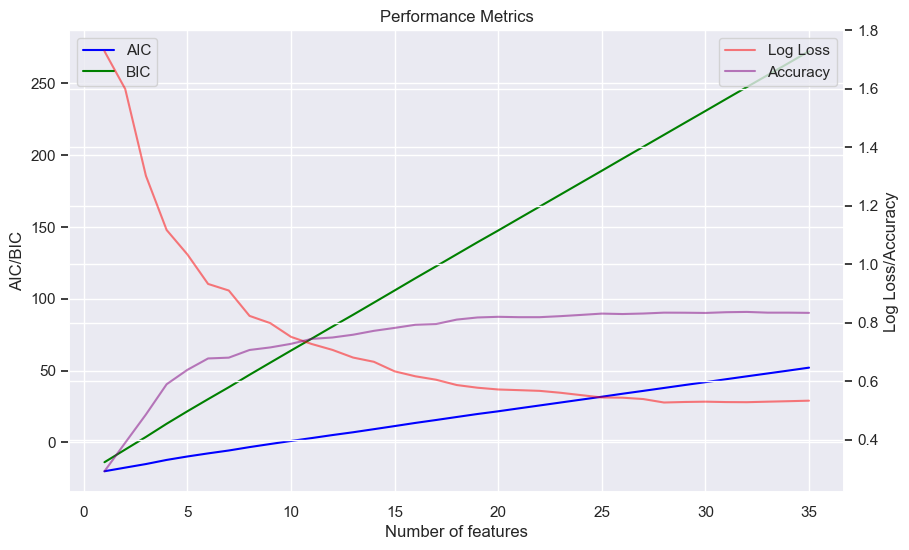

In [24]:
fig, ax1= plt.subplots(figsize=(10, 6))

# Plot AIC and BIC as lines
ax1.plot(results_rfe['Number of features'], results_rfe['AIC'], color='blue', label='AIC')
ax1.plot(results_rfe['Number of features'], results_rfe['BIC'], color='green', label='BIC')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('AIC/BIC')
ax1.legend()

# Create a second y-axis for Log Loss and Accuracy
ax2 = ax1.twinx()

# Plot Log Loss as bars
ax2.plot(results_rfe['Number of features'], results_rfe['Log Loss'], color='red', alpha=0.5, label='Log Loss')
ax2.set_ylabel('Log Loss')

# Plot Accuracy as bars
ax2.plot(results_rfe['Number of features'], results_rfe['Accuracy'], color='purple', alpha=0.5, label='Accuracy')
ax2.set_ylabel('Log Loss/Accuracy')

# Set title and legend
ax2.set_title('Performance Metrics')
ax2.legend()
plt.show()

In [25]:
results_rfe.loc[results_rfe['Number of features'].isin([6, 10, 15]), 'Features']

5     [heart rate, h_temp, c_acc_16Z, c_magY, a_temp...
9     [heart rate, h_temp, h_magX, h_magZ, c_acc_16Z...
14    [heart rate, h_temp, h_gyro_ma, h_magX, h_magY...
Name: Features, dtype: object

In [28]:
results_rfe[results_rfe['Number of features'] == 15]['Features'].tolist()

[['heart rate',
  'h_temp',
  'h_gyro_ma',
  'h_magX',
  'h_magY',
  'h_magZ',
  'c_acc_16Z',
  'c_gyro_ma',
  'c_magX',
  'c_magY',
  'c_magZ',
  'c_mag_ma',
  'a_temp',
  'a_gyro_ma',
  'a_mag_ma']]

In [6]:
col6=['heart rate', 'h_temp', 'c_acc_16Z', 'c_magY', 'a_temp', 'a_gyro_ma']
col10=['heart rate','h_temp','h_magX','h_magZ','c_acc_16Z','c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma']
col15=['heart rate','h_temp','h_gyro_ma','h_magX','h_magY','h_magZ','c_acc_16Z','c_gyro_ma','c_magX',
       'c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma','a_mag_ma']

<font color=black size=3 >**Model1: Number of features=6**<br/>
&emsp;Using RFE （Recursive Feature Elimination）for  feature selection,and calculate the average accuracy and average log loss of cross-validation(cv=5).

In [48]:
# 1) Create train dataset and test dataset
X_train6 = X_train[col6]
X_test6 = X_test[col6]

<font color=black size=3 >**2) Hyperparameter tuning**<br/>
<font color=black size=2 >&emsp;

In [49]:
from sklearn.model_selection import GridSearchCV

scoring = {'Accuracy': 'accuracy',  'Log_loss': 'neg_log_loss'}
logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['saga'],
    'max_iter' : [1000, 2500, 5000]
    }
]
clf_6 = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf_6 = clf_6.fit(X_train6,y_train)
results_best_clf_6  = best_clf_6.cv_results_
best_clf_6.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


LogisticRegression(C=29.763514416313132, max_iter=1000, solver='saga')

In [51]:
print (f'Accuracy - : {best_clf_6.score(X_train6,y_train):.3f}')
print('best score:', best_clf_6.best_score_)
print("best params: " + str(best_clf_6.best_estimator_))
print("best params: " + str(best_clf_6.best_params_))

Accuracy - : 0.684
best score: 0.6795
best params: LogisticRegression(C=29.763514416313132, max_iter=1000, solver='saga')
best params: {'C': 29.763514416313132, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}


<font color=black size=3 >**3) Model Evaluation**<br/>
<font color=black size=2 >&emsp;

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

lr_clf6 = LogisticRegression(C=29.763514416313132, max_iter=1000,solver='saga',  penalty='l2', random_state=0)
scores = cross_val_score(lr_clf6, X_train6, y_train, cv=5)
mean_accuracy = scores.mean()
lr_clf6.fit(X_train6, y_train)
y_pred6 = lr_clf6.predict(X_test6)
report6 = classification_report(y_test, y_pred6)
print(report6)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        78
           1       0.87      0.89      0.88        84
           2       0.75      0.86      0.80        88
           3       0.48      0.49      0.48        82
           4       0.60      0.53      0.56        79
           5       0.77      0.84      0.80        88
           6       0.64      0.64      0.64        84
           7       0.29      0.33      0.31        81
           8       0.36      0.29      0.32        78
           9       0.70      0.66      0.68        86
          10       0.89      0.88      0.89        86
          11       0.75      0.67      0.71        86

    accuracy                           0.68      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.68      0.68      0.68      1000



In [82]:
print("Cross-validation scores:", scores)
print(mean_accuracy)

Cross-validation scores: [0.67125 0.67125 0.6975  0.69375 0.66375]
0.6795


In [83]:
y_pred_proba = lr_clf6.predict_proba(X_test6)
logloss6 = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss6)

Log Loss: 0.9341715430065064


<font color=black size=3 >**4) Confusion Matrix**<br/>
<font color=black size=2 >&emsp;

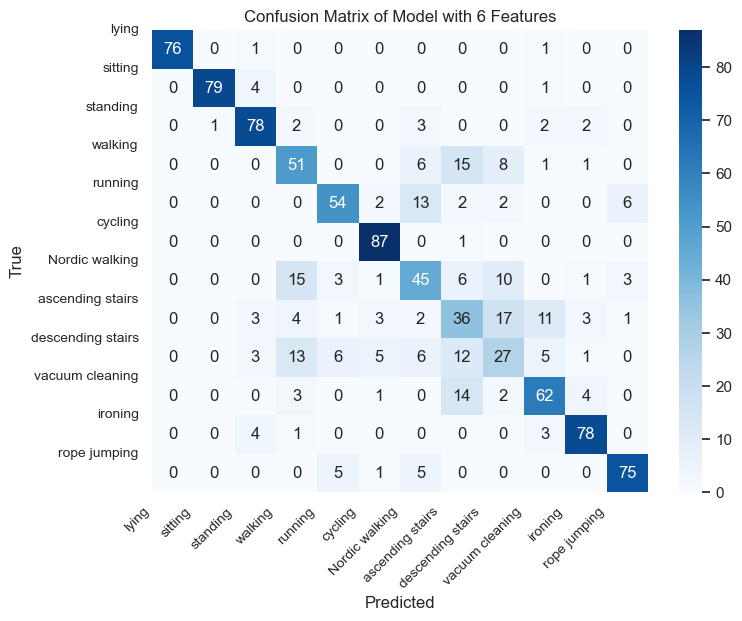

In [84]:
cm_lr6 = confusion_matrix(y_test,y_pred6)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr10, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Model with 6 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 >**5) Check for overfitting and underfitting**<br/>
<font color=black size=2 >&emsp;The training-set accuracy score is 73,8% while the test-set accuracy to be 73.6%. The learning curve shows that there is no question of overfitting or underfitting.

In [85]:
test_score6 = accuracy_score(y_test, lr_clf6.predict(X_test6)) * 100
train_score6 = accuracy_score(y_train, lr_clf6.predict(X_train6)) * 100

results_learn6 = pd.DataFrame(data=[["Logistic Regression_6", train_score6, test_score6]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_learn6

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression_6                68.45                67.7

In [56]:
from sklearn.model_selection import learning_curve
lr_clf6 = LogisticRegression(C=29.763514416313132, max_iter=1000,solver='saga',  penalty='l2', random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator=lr_clf6, X=X_train6, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean6 = np.mean(train_scores, axis=1)
train_std6 = np.std(train_scores, axis=1)
test_mean6 = np.mean(test_scores, axis=1)
test_std6 = np.std(test_scores, axis=1)

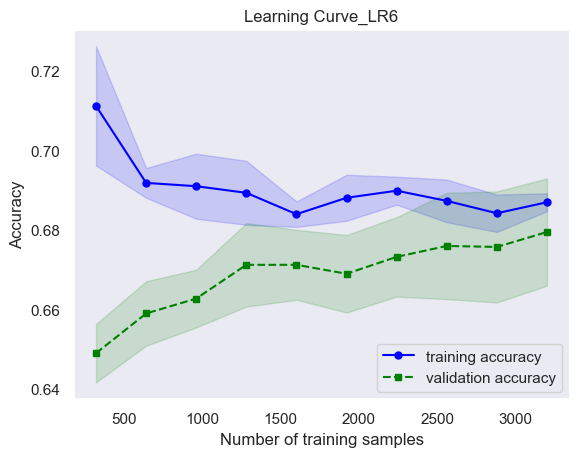

In [57]:
plt.plot(train_sizes, train_mean6, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean6 + train_std6, train_mean6 - train_std6, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean6, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean6 + test_std6, test_mean6 - test_std6, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_LR6')
plt.legend(loc='lower right')
plt.show()

<font color=black size=3 >**Model2: Number of features=10**<br/>

<font color=black size=3 >**1) Create train dataset and test dataset**<br/>
<font color=black size=2 >&emsp;

In [7]:
# 1) Create train dataset and test dataset
X_train10 = X_train[col10]
X_test10 = X_test[col10]

<font color=black size=3 >**2) Hyperparameter tuning**<br/>
<font color=black size=2 >&emsp;

In [8]:
from sklearn.model_selection import GridSearchCV

scoring = {'Accuracy': 'accuracy',  'Log_loss': 'neg_log_loss'}
logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['saga'],
    'max_iter' : [1000, 2500, 5000]
    }
]
clf_10 = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf_10 = clf_10.fit(X_train10,y_train)
results_best_clf_10  = best_clf_10.cv_results_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [35]:
best_clf_10.best_estimator_

LogisticRegression(C=29.763514416313132, max_iter=1000, penalty='l1',
                   solver='saga')

In [36]:
print (f'Accuracy - : {best_clf_10.score(X_train10,y_train):.3f}')
print('best score:', best_clf_10.best_score_)
print("best params: " + str(best_clf_10.best_estimator_))
print("best params: " + str(best_clf_10.best_params_))

Accuracy - : 0.745
best score: 0.73675
best params: LogisticRegression(C=29.763514416313132, max_iter=1000, penalty='l1',
                   solver='saga')
best params: {'C': 29.763514416313132, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


<font color=black size=3 >**3) Model Evaluation**<br/>
<font color=black size=2 >&emsp;

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

lr_clf10 = LogisticRegression(C=29.763514416313132, max_iter=1000,solver='saga',  penalty='l1', random_state=0)
scores = cross_val_score(lr_clf10, X_train10, y_train, cv=5)
mean_accuracy = scores.mean()
lr_clf10.fit(X_train10, y_train)
y_pred10 = lr_clf10.predict(X_test10)
report10 = classification_report(y_test, y_pred10)
print(report10)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           1       0.99      0.94      0.96        84
           2       0.84      0.89      0.86        88
           3       0.57      0.62      0.60        82
           4       0.78      0.68      0.73        79
           5       0.87      0.99      0.93        88
           6       0.56      0.54      0.55        84
           7       0.42      0.44      0.43        81
           8       0.41      0.35      0.38        78
           9       0.72      0.72      0.72        86
          10       0.87      0.91      0.89        86
          11       0.88      0.87      0.88        86

    accuracy                           0.75      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.75      0.75      0.75      1000



In [38]:
print("Cross-validation scores:", scores)
print(mean_accuracy)

Cross-validation scores: [0.72375 0.73625 0.7275  0.75875 0.7375 ]
0.73675


In [39]:
y_pred_proba = lr_clf10.predict_proba(X_test10)
logloss10 = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss10)

Log Loss: 0.7764111012759


<font color=black size=3 >**4) Confusion Matrix**<br/>
<font color=black size=2 >&emsp;

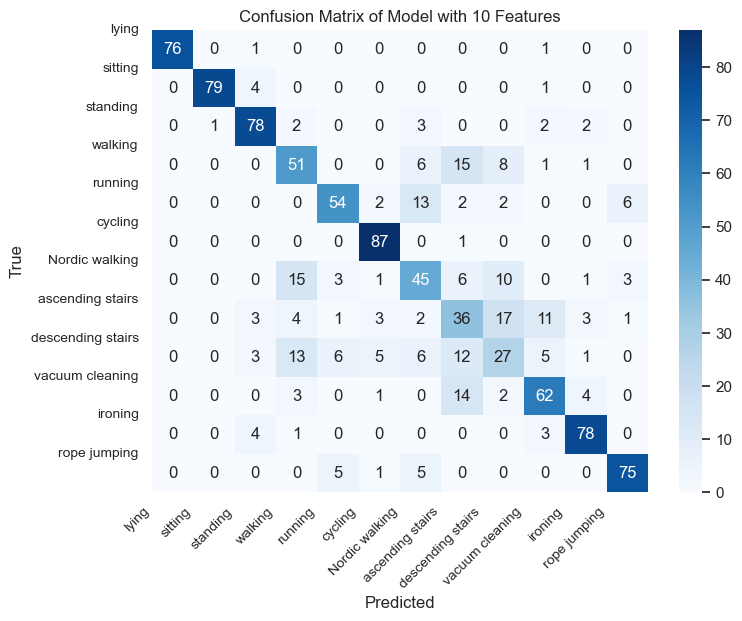

In [40]:
cm_lr10 = confusion_matrix(y_test,y_pred10)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr10, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Model with 10 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 >**5) Check for overfitting and underfitting**<br/>
<font color=black size=2 >&emsp;The training-set accuracy score is 73,8% while the test-set accuracy to be 73.6%. The learning curve shows that there is no question of overfitting or underfitting.

In [41]:
test_score10 = accuracy_score(y_test, lr_clf10.predict(X_test10)) * 100
train_score10 = accuracy_score(y_train, lr_clf10.predict(X_train10)) * 100

results_learn10 = pd.DataFrame(data=[["Logistic Regression_10", train_score10, test_score10]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_learn10

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression_10                74.45                74.8

In [58]:
from sklearn.model_selection import learning_curve
lr_clf10 = LogisticRegression(C=29.763514416313132, max_iter=1000,solver='saga',  penalty='l1', random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator=lr_clf10, X=X_train10, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean10 = np.mean(train_scores, axis=1)
train_std10 = np.std(train_scores, axis=1)
test_mean10 = np.mean(test_scores, axis=1)
test_std10 = np.std(test_scores, axis=1)

C:\Users\the force\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\the force\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\the force\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\the force\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\the force\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\the force\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: Convergen

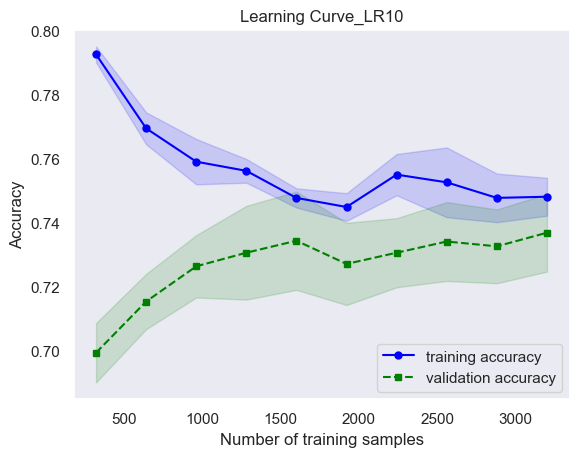

In [59]:
plt.plot(train_sizes, train_mean10, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean10 + train_std10, train_mean10 - train_std10, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean10, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean10 + test_std10, test_mean10 - test_std10, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_LR10')
plt.legend(loc='lower right')
plt.show()

<font color=black size=3 >**Model3: Number of features=15**<br/>
&emsp;Using RFE （Recursive Feature Elimination）for  feature selection,and calculate the average accuracy and average log loss of cross-validation(cv=5).

<font color=black size=3 >**1) Create train dataset and test dataset**<br/>
<font color=black size=2 >&emsp;

In [60]:
# 1) Create train dataset and test dataset
X_train15 = X_train[col15]
X_test15 = X_test[col15]

<font color=black size=3 >**2) Hyperparameter tuning**<br/>
<font color=black size=2 >&emsp;

In [63]:
from sklearn.model_selection import GridSearchCV
scoring = {'Accuracy': 'accuracy',  'Log_loss': 'neg_log_loss'}
logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['saga'],
    'max_iter' : [1000,2500, 5000]
    }
]
clf_15 = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf_15 = clf_15.fit(X_train15,y_train)
results_best_clf_15  = best_clf_15.cv_results_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [64]:
best_clf_15.best_estimator_

LogisticRegression(C=0.615848211066026, max_iter=1000, penalty='l1',
                   solver='saga')

In [65]:
print (f'Accuracy - : {best_clf_15.score(X_train15,y_train):.3f}')
print('best score:', best_clf_15.best_score_)
print("best params: " + str(best_clf_15.best_estimator_))
print("best params: " + str(best_clf_15.best_params_))

Accuracy - : 0.799
best score: 0.7835000000000001
best params: LogisticRegression(C=0.615848211066026, max_iter=1000, penalty='l1',
                   solver='saga')
best params: {'C': 0.615848211066026, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


<font color=black size=3 >**3) Model Evaluation**<br/>
<font color=black size=2 >&emsp;

In [66]:
lr_clf15 = LogisticRegression(C= 0.615848211066026, max_iter=1000, penalty='l1', solver='saga', random_state=0)
scores = cross_val_score(lr_clf15, X_train15, y_train, cv=5)
mean_accuracy = scores.mean()
lr_clf15.fit(X_train15, y_train)
y_pred15 = lr_clf15.predict(X_test15)
report15 = classification_report(y_test, y_pred15)
print(report15)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.95      0.96      0.96        84
           2       0.84      0.91      0.87        88
           3       0.66      0.62      0.64        82
           4       0.79      0.75      0.77        79
           5       0.86      0.99      0.92        88
           6       0.62      0.60      0.61        84
           7       0.50      0.51      0.50        81
           8       0.45      0.38      0.42        78
           9       0.70      0.74      0.72        86
          10       0.90      0.94      0.92        86
          11       0.93      0.90      0.91        86

    accuracy                           0.78      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.78      0.77      1000



In [67]:
print("Cross-validation scores:", scores)
print(mean_accuracy)

Cross-validation scores: [0.78875 0.78375 0.77125 0.79375 0.78   ]
0.7835000000000001


In [68]:
y_pred_proba = lr_clf15.predict_proba(X_test15)
logloss15 = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss15)

Log Loss: 0.6789889432021543


<font color=black size=3 >**4) Confusion Matrix**<br/>
<font color=black size=2 >&emsp;

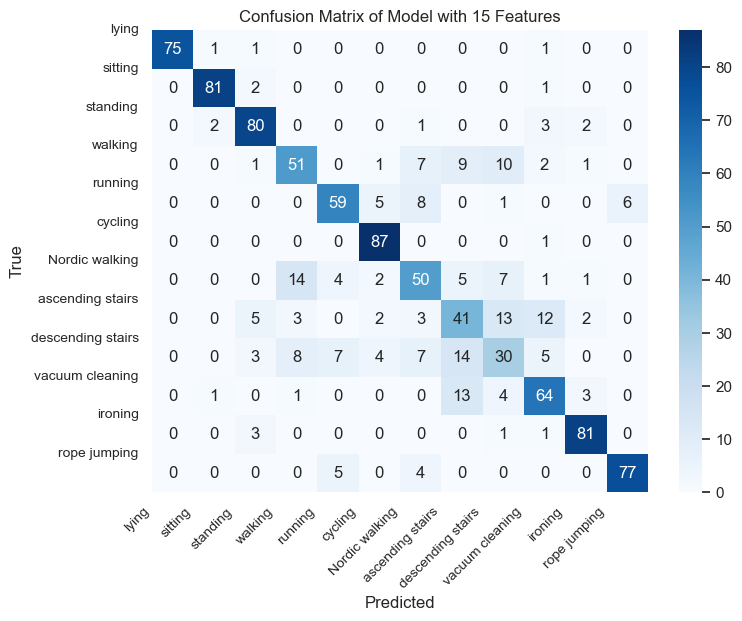

In [69]:
cm_lr15 = confusion_matrix(y_test,y_pred15)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr15, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Model with 15 Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 >**5) Check for overfitting and underfitting**<br/>
<font color=black size=2 >&emsp;The training-set accuracy score is 73,8% while the test-set accuracy to be 73.6%. The learning curve shows that there is no question of overfitting or underfitting.

In [70]:
test_score15 = accuracy_score(y_test, lr_clf15.predict(X_test15)) * 100
train_score15 = accuracy_score(y_train, lr_clf15.predict(X_train15)) * 100

results_learn15 = pd.DataFrame(data=[["Logistic Regression_15", train_score15, test_score15]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_learn15

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression_15                79.95                77.6

In [71]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=lr_clf15, X=X_train15, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean15 = np.mean(train_scores, axis=1)
train_std15 = np.std(train_scores, axis=1)
test_mean15 = np.mean(test_scores, axis=1)
test_std15 = np.std(test_scores, axis=1)

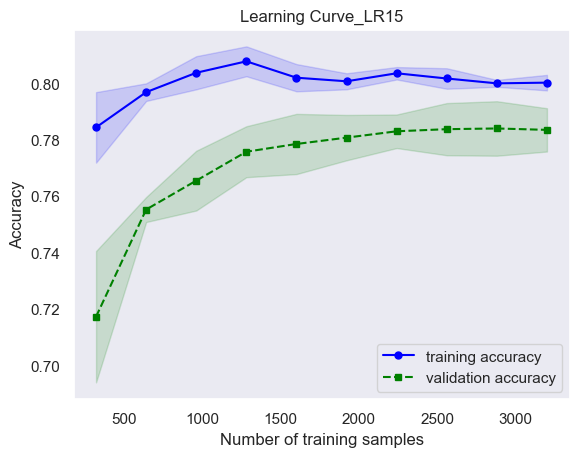

In [72]:
plt.plot(train_sizes, train_mean15, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean15 + train_std15, train_mean15 - train_std15, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean15, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean15 + test_std15, test_mean15 - test_std15, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_LR15')
plt.legend(loc='lower right')
plt.show()

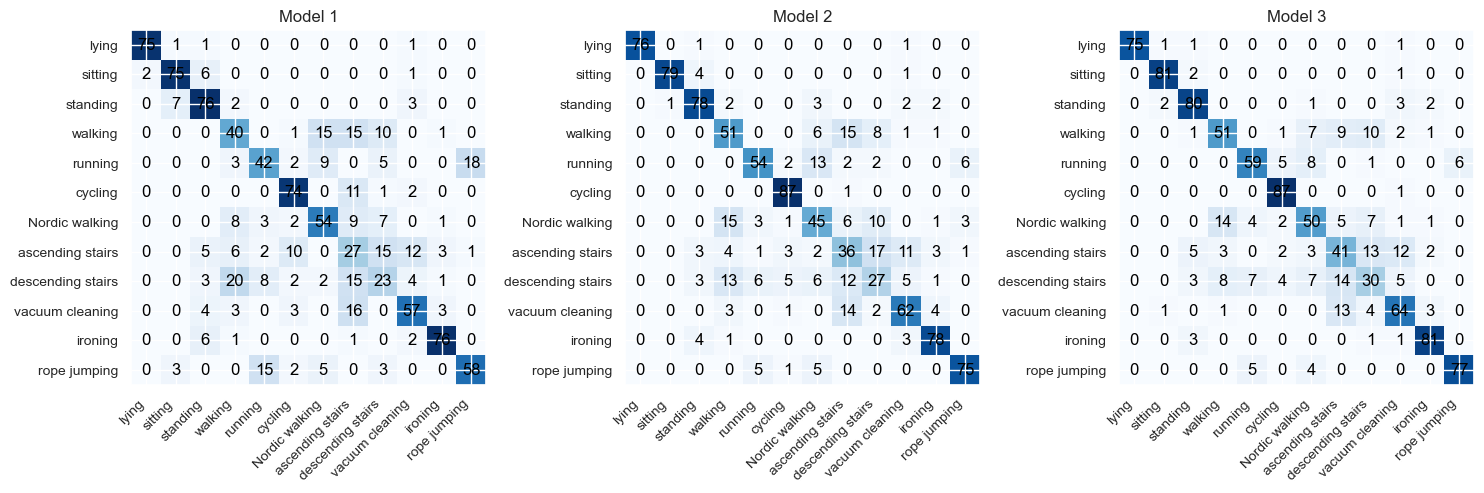

In [73]:
import numpy as np
import matplotlib.pyplot as plt

confusion_matrices = [cm_lr6, cm_lr10, cm_lr15]

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

class_names = ['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'ascending stairs', 'descending stairs', 'vacuum cleaning', 'ironing', 'rope jumping']

for i, ax in enumerate(axs.flat):
    cm = confusion_matrices[i] 
    im = ax.imshow(cm, cmap='Blues')

    ax.set_title(f"Model {i+1}")
    # ax.set_xlabel('Predicted')
    # ax.set_ylabel('True')
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names, fontsize=10, rotation=45, ha='right')
    ax.set_yticklabels(class_names, fontsize=10)

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


In [86]:
lgr_results = pd.concat([results_learn6, results_learn10, results_learn15], ignore_index=True)
lgr_results

Model  Training Accuracy %  Testing Accuracy %
0   Logistic Regression_6                68.45                67.7
1  Logistic Regression_10                74.45                74.8
2  Logistic Regression_15                79.95                77.6

<font color=black size=4 >**4.4 Decision Trees**<br/> 
    
<font color=black size=3 > **1. Fit the Full Model**<br/>
<font color=black size=2 >

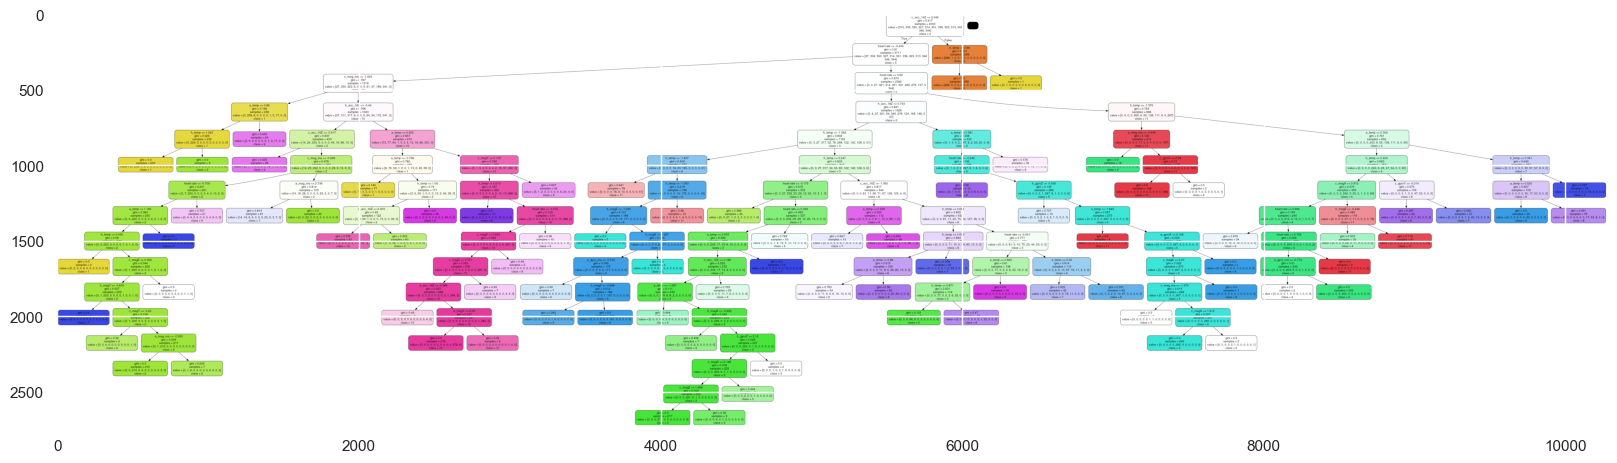

In [89]:
import io
dt0 = DecisionTreeClassifier(min_samples_split=100)
dt0.fit(X_train,y_train)
class_names = [str(i) for i in range(12)] 

import imageio.v2 as imageio
import pydotplus

def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features, class_names=class_names,
                   filled=True, rounded=True) 
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (20,50)
    plt.imshow(img)
    
feature_names = X_train.columns.tolist()    
show_tree(dt0,feature_names,'decision_tree')

In [90]:
y_pred_dt0 = dt0.predict(X_test)
report_dt0 = classification_report(y_test, y_pred_dt0)
print(report_dt0)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.95      0.87      0.91        84
           2       0.86      0.91      0.88        88
           3       0.91      0.78      0.84        82
           4       0.88      0.76      0.82        79
           5       0.90      0.84      0.87        88
           6       0.86      0.79      0.82        84
           7       0.68      0.70      0.69        81
           8       0.59      0.72      0.65        78
           9       0.75      0.86      0.80        86
          10       0.95      0.90      0.92        86
          11       0.86      0.99      0.92        86

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [91]:
test_score_dt0 = accuracy_score(y_test, dt0.predict(X_test)) * 100
train_score_dt0 = accuracy_score(y_train,dt0.predict(X_train)) * 100

accuracy_dt0 = pd.DataFrame(data=[["Decision Tree_Full", train_score_dt0, test_score_dt0]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
accuracy_dt0

Model  Training Accuracy %  Testing Accuracy %
0  Decision Tree_Full                 86.3                84.1

<font color=black size=4 > **2. Feature Selection**<br/>
<font color=black size=3 > **1) Remove Features with 0 Importance**<br/>
<font color=black size=2 >&emsp;Get the importance of features from full decision tree model. Some features have zero importance which can be removed from model.

In [93]:
importance = dt0.feature_importances_
feature_names = X_train.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

       Feature  Importance
1       h_temp    0.226108
0   heart rate    0.197758
14   c_acc_16Z    0.154782
24      a_temp    0.150552
23    c_mag_ma    0.071288
4    h_acc_16Z    0.059401
2    h_acc_16X    0.051007
20      c_magX    0.026681
34    a_mag_ma    0.016350
12      h_magZ    0.013204
21      c_magY    0.012366
17     c_gyroY    0.006096
8      h_gyroZ    0.005346
10      h_magX    0.002927
22      c_magZ    0.002625
28   a_gyro_ma    0.001166
26   a_acc_16Z    0.000856
11      h_magY    0.000814
29     a_gyroX    0.000673
15    c_acc_ma    0.000000
33      a_magZ    0.000000
32      a_magY    0.000000
31     a_gyroZ    0.000000
30     a_gyroY    0.000000
27    a_acc_ma    0.000000
25   a_acc_16Y    0.000000
16     c_gyroX    0.000000
3    h_acc_16Y    0.000000
5     h_acc_ma    0.000000
13   c_acc_16X    0.000000
6      h_gyroX    0.000000
19   c_gyro_ma    0.000000
18     c_gyroZ    0.000000
7      h_gyroY    0.000000
9    h_gyro_ma    0.000000


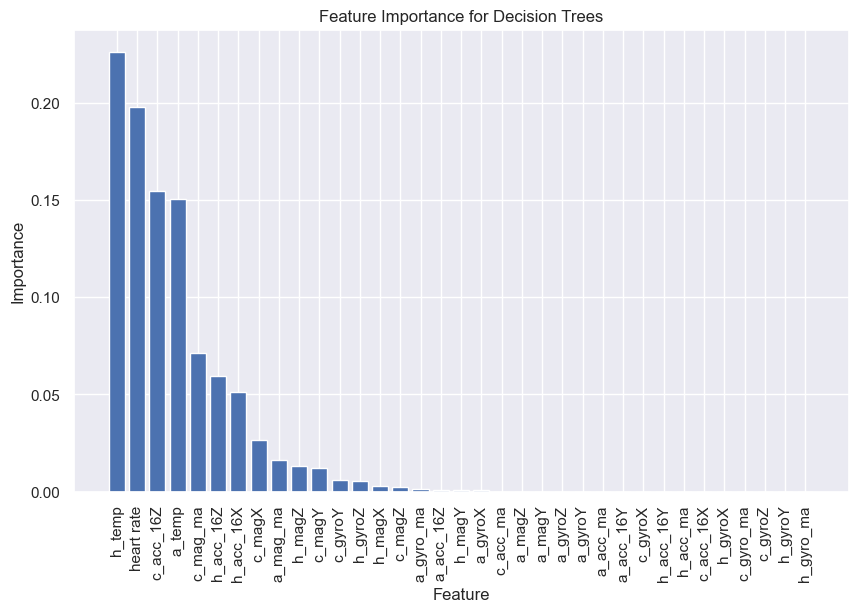

In [94]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Decision Trees')
plt.show()

In [95]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()
selected_features = X_train.columns.tolist()

while True:
    dt = DecisionTreeClassifier(min_samples_split=100, random_state=43)
    dt.fit(X_train2, y_train)
    feature_importance = dt.feature_importances_
    zero_importance_features = [feature for feature, importance in zip(selected_features, feature_importance) if importance == 0.0]

    if len(zero_importance_features) == 0:
        break

    selected_features = [feature for feature in selected_features if feature not in zero_importance_features]
    X_train2 = X_train2[selected_features]
    X_test2 = X_test2[selected_features]

final_feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': dt.feature_importances_})
print(final_feature_importance)

       Feature  Importance
0   heart rate    0.197758
1       h_temp    0.223386
2    h_acc_16X    0.053044
3    h_acc_16Z    0.059624
4      h_gyroZ    0.005346
5       h_magX    0.002927
6       h_magY    0.000814
7       h_magZ    0.013204
8    c_acc_16Z    0.154782
9      c_gyroY    0.006096
10      c_magX    0.029107
11      c_magY    0.012366
12      c_magZ    0.003297
13    c_mag_ma    0.071290
14      a_temp    0.148586
15   a_acc_16Z    0.000856
16   a_gyro_ma    0.001166
17    a_mag_ma    0.016350


<font color=black size=3 > **2) RFE**<br/>
<font color=black size=2 >&emsp; For 17 features, perform the RFE feature selection. Calculate the average accuracy and average log loss of cross-validation(cv=5). 

Optimal number of features: 3
Selected features: ['heart rate', 'h_temp', 'a_temp']


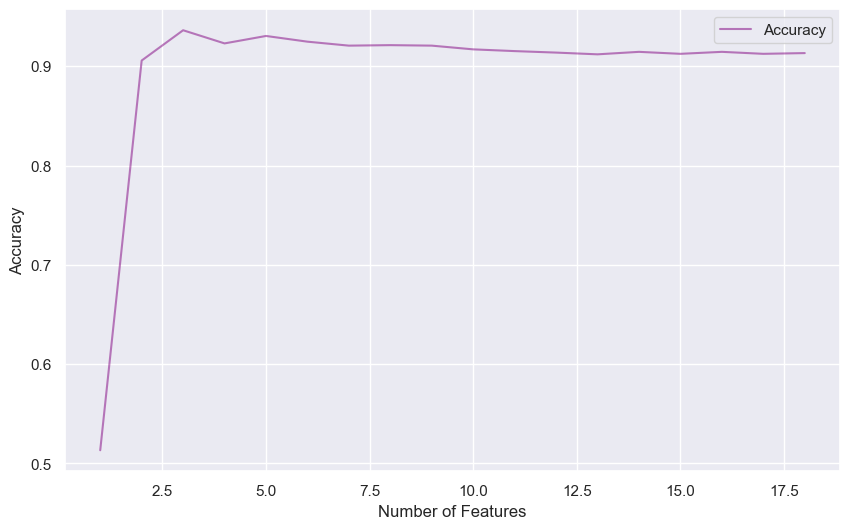

In [98]:
from sklearn.feature_selection import RFECV
dt_fs = DecisionTreeClassifier(min_samples_split=10, random_state=43)
results_dt_fs = pd.DataFrame()

rfecv = RFECV(estimator=dt_fs, step=1, cv=5, scoring='accuracy') 
rfecv.fit(X_train2, y_train)

results_dt_fs['Accuracy'] = rfecv.cv_results_['mean_test_score']
results_dt_fs['Num Features'] = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train2.columns[rfecv.support_]))

fig, ax= plt.subplots(figsize=(10, 6))
ax.plot(results_dt_fs['Num Features'], results_dt_fs['Accuracy'], color='purple', alpha=0.5, label='Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Features')
ax.legend()
plt.show()

<font color=black size=4 > **3. Fit Model with 3 Features**<br/>
<font color=black size=3 >**1) Create train dataset and test dataset**<br/>
<font color=black size=2 >&emsp;

In [99]:
opt_features= ['heart rate', 'h_temp', 'a_temp']
X_test3 = X_test[opt_features]
X_train3 = X_train[opt_features]
X_train3 

heart rate   h_temp  a_temp
976      -0.8926  1.07400  0.4970
4567     -1.4940  0.85550  0.2185
1388     -0.4922  0.04462 -0.2834
431      -0.9260  0.85550  0.8315
2251      0.5430  0.29420  0.9440
...          ...      ...     ...
1452     -0.1583  0.82400  0.3857
1813      1.6780  0.38800  0.2185
3902      0.9100 -0.39230  0.2742
366      -0.2585  0.76200  0.7200
4022     -0.4922 -1.26600 -2.6820

[4000 rows x 3 columns]

<font color=black size=3 >**2) Hyperparameter tuning**<br/>
<font color=black size=2 >&emsp; Best_params: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'best'}

In [103]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":["entropy"], 
          "splitter":["best"], 
          "max_depth":list(range(1, 50, 5)), 
          "min_samples_split":[20, 60, 100, 120, 200 ], 
          "min_samples_leaf": list(range(1, 50, 5))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train3, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best_params: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'best'}


In [105]:
from sklearn.model_selection import cross_val_score
import numpy as np

depths = list(range(1, 50))
train_accuracy = np.empty(len(depths))
test_accuracy = np.empty(len(depths))

for i in range(len(depths)):
    np.random.seed(42)
    dtree_md = DecisionTreeClassifier(max_depth=depths[i])
    dtree_md.fit(X_train3, y_train)
    train_accuracy[i] = np.mean(cross_val_score(dtree_md, X_train3, y_train, cv=5))
    test_accuracy[i] = np.mean(cross_val_score(dtree_md, X_test3, y_test, cv=5))

results_dt3 = pd.DataFrame({'Depth': depths, 'Train Score': train_accuracy, 'Test Score': test_accuracy})


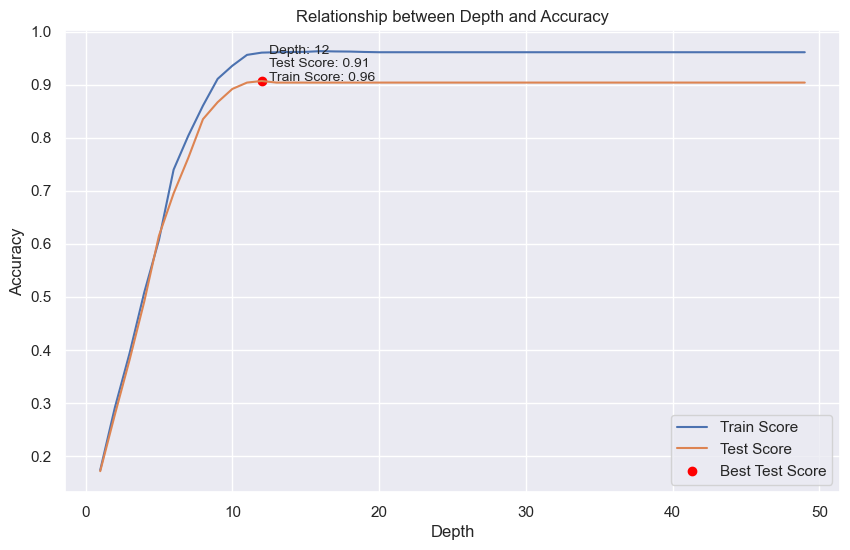

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(results_dt3['Depth'], results_dt3['Train Score'], label='Train Score')
plt.plot(results_dt3['Depth'], results_dt3['Test Score'], label='Test Score')

max_test_score = results_dt3['Test Score'].max()
best_depth = results_dt3.loc[results_dt3['Test Score'].idxmax(), 'Depth']
best_train_score = results_dt3.loc[results_dt3['Test Score'].idxmax(), 'Train Score']
plt.scatter(best_depth, max_test_score, color='red', label='Best Test Score')

plt.annotate(f'Depth: {best_depth}\nTest Score: {max_test_score:.2f}\nTrain Score: {best_train_score:.2f}',
             (best_depth + 0.5, max_test_score), fontsize=10)

plt.title('Relationship between Depth and Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<font color=black size=3 >**3) Model Evaluation**<br/>

In [111]:
dt_opt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 11, 
                                min_samples_leaf= 5, min_samples_split=20, 
                                splitter= 'best', random_state=42)
dt_opt.fit(X_train3, y_train)
y_pred_dt_opt = dt_opt.predict(X_test3)
report_dt_opt = classification_report(y_test, y_pred_dt_opt)
print(report_dt_opt)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        78
           1       0.96      0.92      0.94        84
           2       0.90      0.93      0.92        88
           3       1.00      0.96      0.98        82
           4       0.89      0.91      0.90        79
           5       1.00      0.88      0.93        88
           6       0.98      0.95      0.96        84
           7       0.91      0.89      0.90        81
           8       0.89      0.97      0.93        78
           9       0.95      0.98      0.97        86
          10       0.90      0.95      0.93        86
          11       0.90      0.91      0.90        86

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



<font color=black size=3 >**4) Visualise Model**<br/>

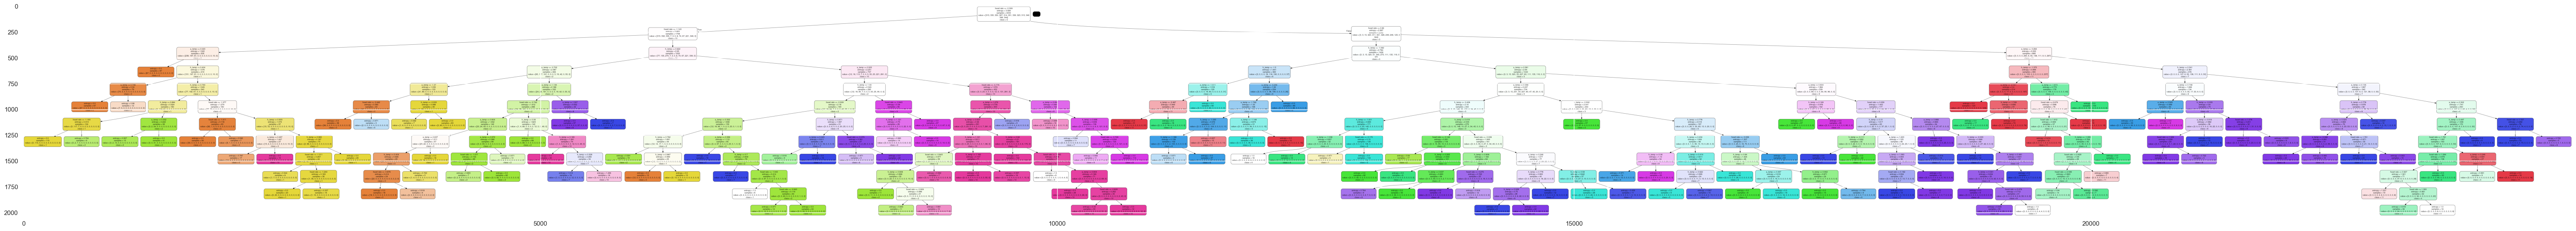

In [112]:
class_names = [str(i) for i in range(12)] 
import io
import imageio.v2 as imageio
import pydotplus

def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features, class_names=class_names,
                   filled=True, rounded=True) 
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (80, 50)
    plt.imshow(img)

feature_names = X_train3.columns.tolist()
show_tree(dt_opt, feature_names, 'decision_tree')

<font color=black size=3 >**5) Confusion Matrix**<br/>
<font color=black size=2 >&emsp;

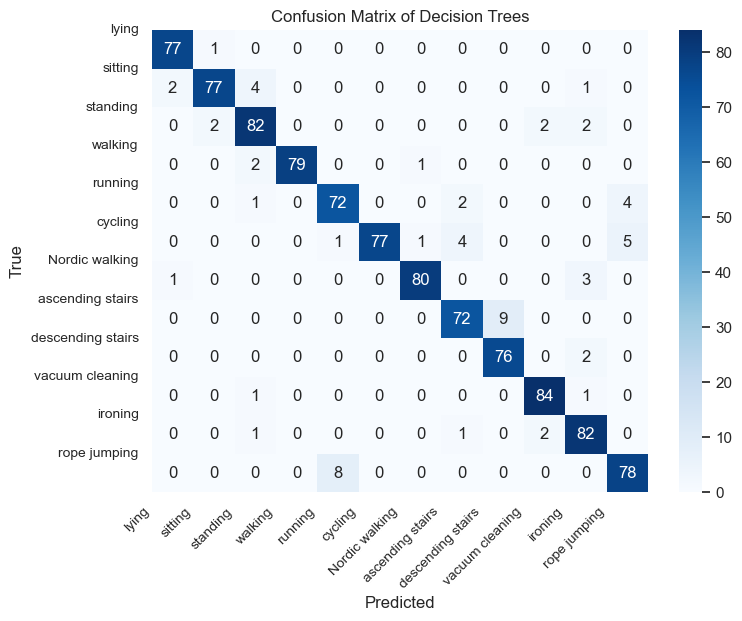

In [113]:
cm_dt_opt= confusion_matrix(y_test,y_pred_dt_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_opt, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 >**6) Check for overfitting and underfitting**<br/>
<font color=black size=2 >&emsp;

In [114]:
test_scoredt_opt = accuracy_score(y_test, dt_opt.predict(X_test3)) * 100
train_scoredt_opt = accuracy_score(y_train, dt_opt.predict(X_train3)) * 100

results_learndt_opt = pd.DataFrame(data=[["Decision Tree", train_scoredt_opt, test_scoredt_opt]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_learndt_opt

Model  Training Accuracy %  Testing Accuracy %
0  Decision Tree                95.45                93.6

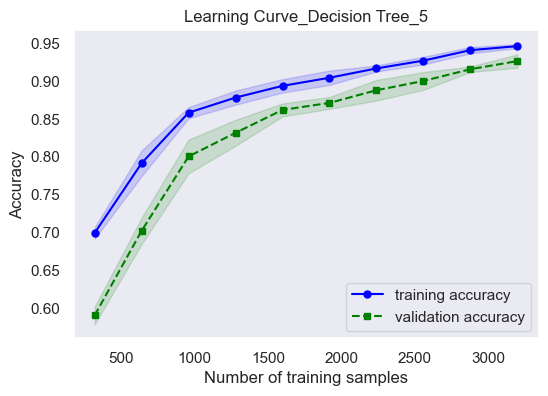

In [115]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=dt_opt, X=X_train3, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean3 = np.mean(train_scores, axis=1)
train_std3 = np.std(train_scores, axis=1)
test_mean3 = np.mean(test_scores, axis=1)
test_std3 = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean3, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean3 + train_std3, train_mean3 - train_std3, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean3, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean3 + test_std3, test_mean3 - test_std3, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_Decision Tree_5')
plt.legend(loc='lower right')
plt.show()

<font color=black size=4 >**4.5 Random Forest**<br/> 
    
<font color=black size=3 > **1. Fit the Full Model**<br/>
<font color=black size=2 >&emsp;The full model with default parameters and all features is too complicated.

In [116]:
rf0 = RandomForestClassifier(random_state=0)
rf0.fit(X_train,y_train)
rf_pred = rf0.predict(X_test)
y_pred_rf0 = rf0.predict(X_test)
report_rf0 = classification_report(y_test, y_pred_rf0)
print(report_rf0)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           1       0.98      0.96      0.97        84
           2       0.98      0.99      0.98        88
           3       0.96      0.95      0.96        82
           4       1.00      0.94      0.97        79
           5       0.98      1.00      0.99        88
           6       1.00      0.99      0.99        84
           7       0.90      0.90      0.90        81
           8       0.88      0.90      0.89        78
           9       0.96      0.99      0.97        86
          10       0.99      1.00      0.99        86
          11       0.99      1.00      0.99        86

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [117]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

def visualize_tree(tree, feature_names, output_path):
    dot_data = export_graphviz(tree, out_file=None, feature_names=feature_names, filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(output_path)
    return Image(filename=output_path)

# Visualize a decision tree
#visualize_tree(dt0, feature_names, 'decision_tree.png')

# Visualize a tree in a random forest
feature_names = X_train.columns.tolist()
visualize_tree(rf0.estimators_[0], feature_names, 'random_forest_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.501669 to fit



<font color=black size=4 > **2. Feature Selection**<br/>
<font color=black size=3 > **1) Importance**<br/>
<font color=black size=2 >&emsp;Get the importance of features from full model. Some features have zero importance which can be removed from model.

Feature ranking:
1. feature 0 (0.097677)
2. feature 1 (0.088907)
3. feature 24 (0.077495)
4. feature 14 (0.058106)
5. feature 23 (0.043550)
6. feature 21 (0.041028)
7. feature 22 (0.039461)
8. feature 20 (0.038334)
9. feature 4 (0.037260)
10. feature 28 (0.036889)
11. feature 2 (0.035435)
12. feature 34 (0.033218)
13. feature 9 (0.033153)
14. feature 19 (0.030628)
15. feature 10 (0.029951)
16. feature 33 (0.027137)
17. feature 12 (0.025451)
18. feature 15 (0.020575)
19. feature 25 (0.018984)
20. feature 3 (0.017613)
21. feature 17 (0.016827)
22. feature 11 (0.016608)
23. feature 27 (0.014629)
24. feature 32 (0.014467)
25. feature 26 (0.013456)
26. feature 31 (0.012627)
27. feature 13 (0.010445)
28. feature 7 (0.010421)
29. feature 29 (0.009890)
30. feature 30 (0.008926)
31. feature 8 (0.008837)
32. feature 5 (0.008731)
33. feature 16 (0.008178)
34. feature 18 (0.007903)
35. feature 6 (0.007204)


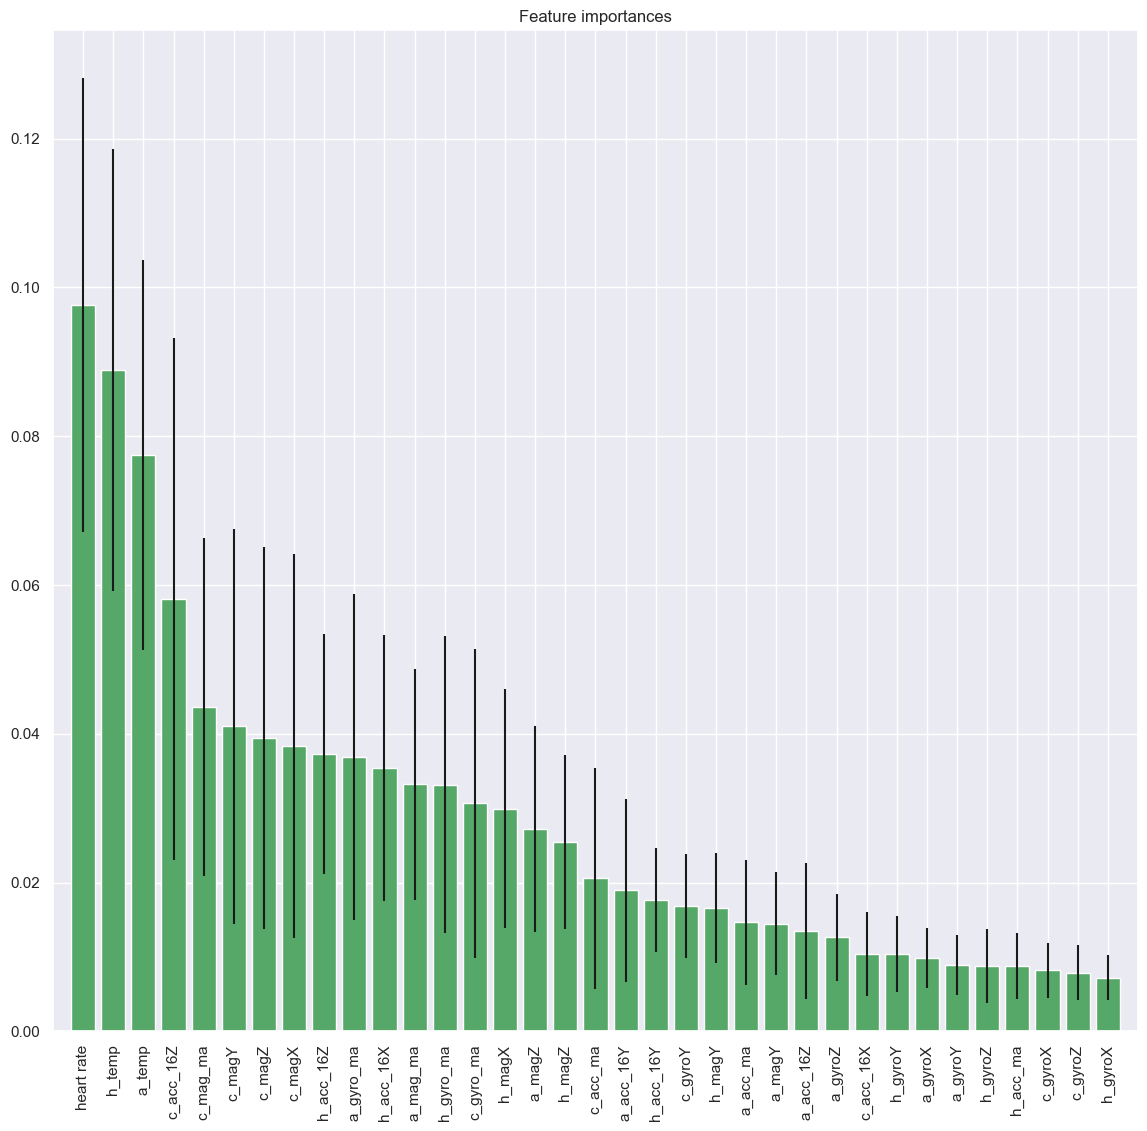

In [119]:
importances = rf0.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

<font color=black size=3 > **2) RFE**<br/>
<font color=black size=2 > 

Optimal number of features: 5
Selected features: ['heart rate', 'h_temp', 'c_acc_16Z', 'c_mag_ma', 'a_temp']


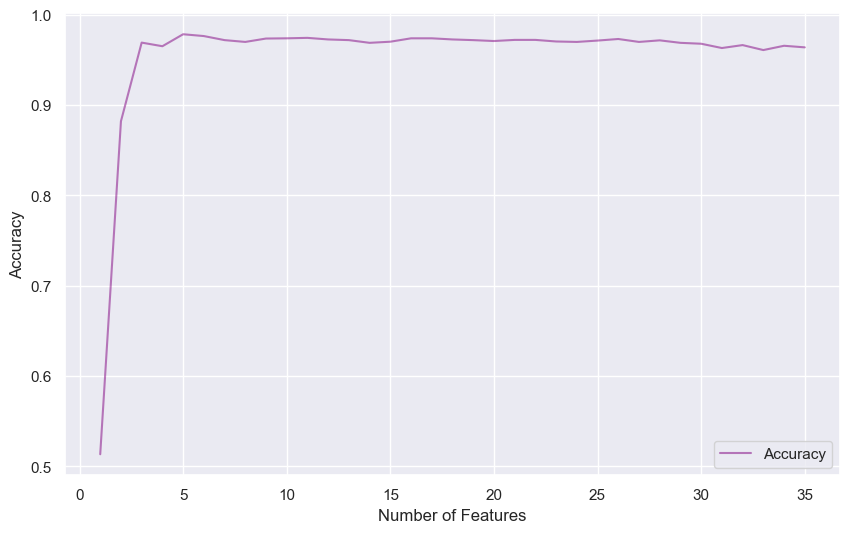

In [120]:
from sklearn.feature_selection import RFECV
rf_fs = RandomForestClassifier(random_state=0)
results_rf_fs = pd.DataFrame()

rfecv = RFECV(estimator=rf_fs, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

results_rf_fs['Accuracy'] = rfecv.cv_results_['mean_test_score']
results_rf_fs['Num Features'] = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

fig, ax= plt.subplots(figsize=(10, 6))
ax.plot(results_rf_fs['Num Features'], results_rf_fs['Accuracy'], color='purple', alpha=0.5, label='Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Features')
ax.legend()
plt.show()

<font color=black size=4 > **3. Fit Model with 5Features**<br/>
<font color=black size=3 >**1) Create train dataset and test dataset**<br/>

In [122]:
opt_features= ['heart rate', 'h_temp', 'c_acc_16Z', 'c_mag_ma', 'a_temp']
X_test1 = X_test[opt_features]
X_train1 = X_train[opt_features]
X_train1 

heart rate   h_temp  c_acc_16Z  c_mag_ma  a_temp
976      -0.8926  1.07400    0.73340  -1.25300  0.4970
4567     -1.4940  0.85550    2.50800   0.14940  0.2185
1388     -0.4922  0.04462    0.19870   1.57400 -0.2834
431      -0.9260  0.85550   -0.33940  -0.34640  0.8315
2251      0.5430  0.29420    0.09515  -0.03357  0.9440
...          ...      ...        ...       ...     ...
1452     -0.1583  0.82400   -0.16030  -0.31150  0.3857
1813      1.6780  0.38800    0.01326  -0.19580  0.2185
3902      0.9100 -0.39230   -1.10450   1.25000  0.2742
366      -0.2585  0.76200   -0.05790  -1.02200  0.7200
4022     -0.4922 -1.26600   -0.23820   1.59300 -2.6820

[4000 rows x 5 columns]

<font color=black size=3 >**2) Hyperparameter tuning**<br/>

In [123]:
from sklearn.model_selection import GridSearchCV
params_grid = {
    'n_estimators':[30, 100, 300, 500], 
    #'max_features': ['auto', 'sqrt','log2'],
    'criterion' :['entropy'],
    'max_depth': (list(range(1, 50, 5))), 
    'min_samples_split':[5, 100, 200],
    'min_samples_leaf': [5, 30, 50]
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", verbose=1, n_jobs=-1)
rf_cv.fit(X_train1, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}


<font color=black size=3 >**3) Model Evaluation**<br/>

In [127]:
from sklearn.model_selection import cross_val_score
rf_opt = RandomForestClassifier(criterion='woyo', max_depth=16, min_samples_leaf= 5, 
                                min_samples_split=15, n_estimators=50, random_state=42)
rf_opt.fit(X_train1, y_train)
y_pred_rf_opt = rf_opt.predict(X_test1)
report_rf_opt = classification_report(y_test, y_pred_rf_opt)

cross_train_accuracy = np.mean(cross_val_score(rf_opt, X_train1, y_train, cv=5))
cross_test_accuracy = np.mean(cross_val_score(rf_opt, X_test1, y_test, cv=5))
print(f"Cross Test Accuracy: {cross_test_accuracy}")
print(f"Cross Train Accuracy: {cross_train_accuracy}")
print(report_rf_opt)

Cross Test Accuracy: 0.8779999999999999
Cross Train Accuracy: 0.9629999999999999
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.98      0.98      0.98        84
           2       0.97      1.00      0.98        88
           3       1.00      0.98      0.99        82
           4       1.00      0.96      0.98        79
           5       1.00      0.92      0.96        88
           6       0.94      0.99      0.97        84
           7       0.92      0.94      0.93        81
           8       0.94      0.96      0.95        78
           9       0.99      0.97      0.98        86
          10       0.97      1.00      0.98        86
          11       0.94      0.98      0.96        86

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



<font color=black size=3 >**4) Confusion Matrix**<br/>

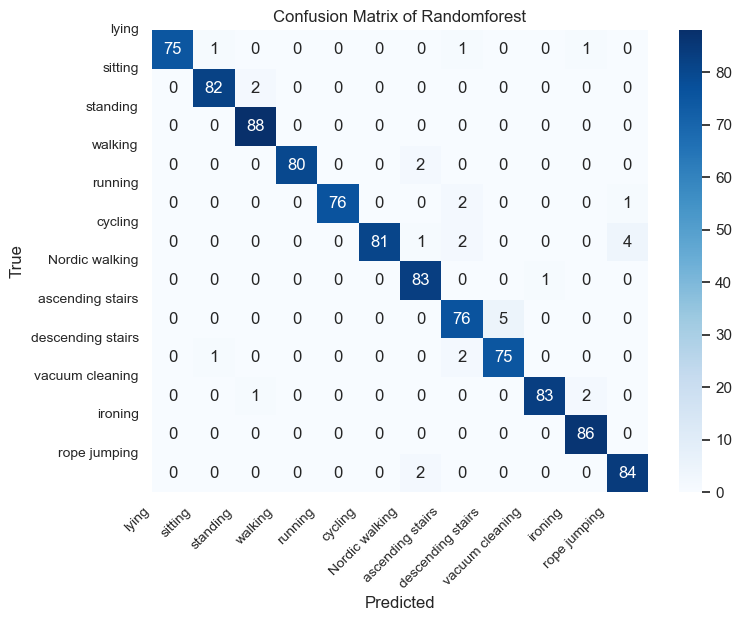

In [129]:
cm_rf_opt= confusion_matrix(y_test,y_pred_rf_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_opt, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Randomforest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 >**5) Check for overfitting and underfitting**<br/>

In [130]:
test_scorerf_opt = accuracy_score(y_test, rf_opt.predict(X_test1)) * 100
train_scorerf_opt = accuracy_score(y_train, rf_opt.predict(X_train1)) * 100

results_learnrf_opt = pd.DataFrame(data=[["Random Forest", train_scorerf_opt, test_scorerf_opt]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_learnrf_opt

Model  Training Accuracy %  Testing Accuracy %
0  Random Forest                 98.6                96.9

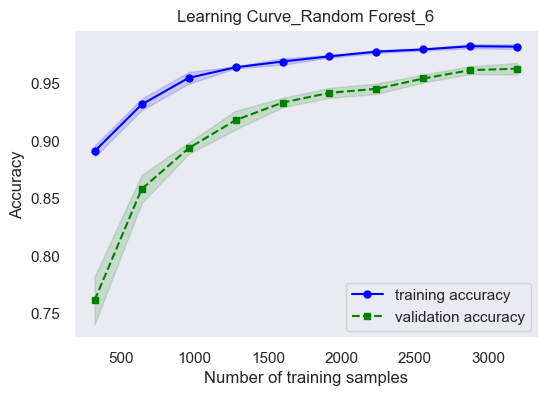

In [128]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rf_opt, X=X_train1, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean_rf = np.mean(train_scores, axis=1)
train_std_rf = np.std(train_scores, axis=1)
test_mean_rf = np.mean(test_scores, axis=1)
test_std_rf = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean_rf, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean_rf + train_std_rf, train_mean_rf - train_std_rf, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean_rf, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean_rf + test_std_rf, test_mean_rf - test_std_rf, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_Random Forest_6')
plt.legend(loc='lower right')
plt.show()

<font color=black size=4 >**4.6 K Nearest Neighbors**<br/> 
    
<font color=black size=4 > **1. Feature Selection**<br/>
<font color=black size=3 > **1) Importance - Random forest**<br/>

In [131]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X_train.columns[sorted_indices]

result_im = pd.DataFrame(columns=['Num Features', 'Features', 'Train Accuracy', 'Test Accuracy'])
knn = KNeighborsClassifier(n_neighbors=3)

for i in range(1, len(sorted_features) + 1):
    np.random.seed(42)
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    # Perform cross-validation and calculate average training and test accuracies
    train_accuracy = cross_val_score(knn, X_train_selected, y_train, cv=5).mean()
    test_accuracy = cross_val_score(knn, X_test_selected, y_test, cv=5).mean()
    result_im.loc[i] = [i, ', '.join(selected_features), train_accuracy, test_accuracy]

result_im

Num Features                                           Features  \
1              1                                         heart rate   
2              2                                 heart rate, h_temp   
3              3                         heart rate, h_temp, a_temp   
4              4              heart rate, h_temp, a_temp, c_acc_16Z   
5              5      heart rate, h_temp, a_temp, c_acc_16Z, c_magY   
6              6  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
7              7  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
8              8  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
9              9  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
10            10  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
11            11  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
12            12  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
13            13  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
14            14  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
15            15  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
16            16  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
17            17  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
18            18  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
19            19  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
20            20  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
21            21  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
22            22  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
23            23  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
24            24  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
25            25  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
26            26  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
27            27  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
28            28  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
29            29  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
30            30  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
31            31  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
32            32  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
33            33  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
34            34  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   
35            35  heart rate, h_temp, a_temp, c_acc_16Z, c_magY,...   

    Train Accuracy  Test Accuracy  
1          0.34375          0.292  
2          0.84475          0.747  
3          0.95150          0.880  
4          0.89100          0.817  
5          0.88025          0.799  
6          0.87800          0.789  
7          0.84475          0.751  
8          0.84475          0.750  
9          0.84450          0.785  
10         0.85750          0.810  
11         0.86000          0.799  
12         0.86050          0.781  
13         0.86750          0.793  
14         0.87600          0.776  
15         0.87275          0.779  
16         0.88100          0.778  
17         0.88050          0.787  
18         0.88475          0.794  
19         0.89250          0.802  
20         0.89625          0.806  
21         0.88875          0.798  
22         0.88675          0.784  
23         0.88600          0.773  
24         0.88200          0.773  
25         0.87575          0.763  
26         0.87675          0.757  
27         0.87250          0.759  
28         0.86675          0.760  
29         0.86950          0.753  
30         0.86675          0.762  
31         0.86550          0.758  
32         0.86600          0.754  
33         0.86500          0.751  
34         0.86150          0.747  
35         0.85775          0.744

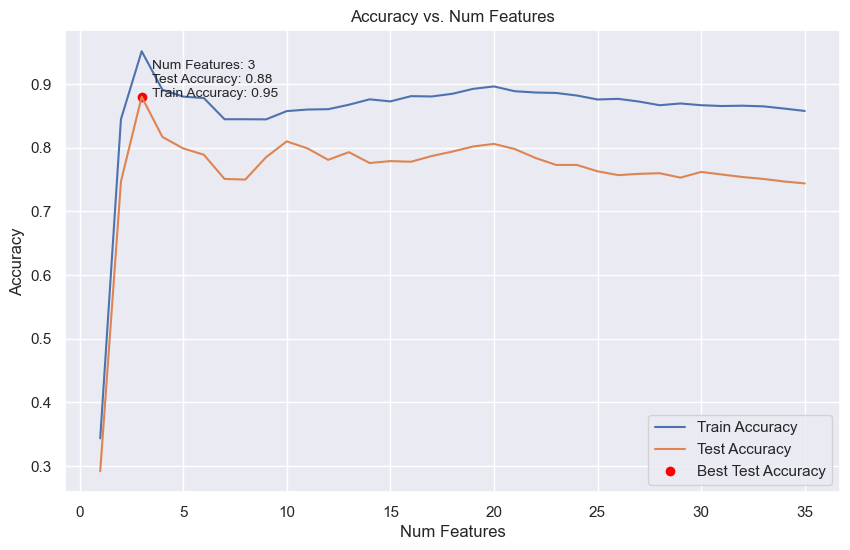

In [134]:
plt.subplots(figsize=(10, 6))
plt.plot(result_im['Num Features'], result_im['Train Accuracy'], label='Train Accuracy')
plt.plot(result_im['Num Features'], result_im['Test Accuracy'], label='Test Accuracy')
max_test_score = result_im['Test Accuracy'].max()
Num_Features = result_im.loc[result_im['Test Accuracy'].idxmax(), 'Num Features']
best_train_score = result_im.loc[result_im['Test Accuracy'].idxmax(), 'Train Accuracy']
plt.scatter(Num_Features, max_test_score, color='red', label='Best Test Accuracy')

plt.annotate(f'Num Features: {Num_Features}\nTest Accuracy: {max_test_score:.2f}\nTrain Accuracy: {best_train_score:.2f}',
             (Num_Features + 0.5, max_test_score), fontsize=10)

plt.xlabel('Num Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Num Features')

plt.legend()

plt.show()

<font color=black size=3 > **2) Importance - Gradient Boosting Tree**<br/>

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train, y_train)

feature_importances = gbt.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X_train.columns[sorted_indices]

result_gbt = pd.DataFrame(columns=['Num Features', 'Features', 'Train Accuracy', 'Test Accuracy'])
knn = KNeighborsClassifier(n_neighbors=3)

for i in range(1, len(sorted_features) + 1):
    np.random.seed(42)
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    # Perform cross-validation and calculate average training and test accuracies
    train_accuracy = cross_val_score(knn, X_train_selected, y_train, cv=5).mean()
    test_accuracy = cross_val_score(knn, X_test_selected, y_test, cv=5).mean()
    result_gbt.loc[i] = [i, ', '.join(selected_features), train_accuracy, test_accuracy]
result_gbt

Num Features                                           Features  \
1              1                                         heart rate   
2              2                                 heart rate, h_temp   
3              3                         heart rate, h_temp, a_temp   
4              4              heart rate, h_temp, a_temp, c_acc_16Z   
5              5    heart rate, h_temp, a_temp, c_acc_16Z, c_mag_ma   
6              6  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
7              7  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
8              8  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
9              9  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
10            10  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
11            11  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
12            12  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
13            13  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
14            14  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
15            15  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
16            16  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
17            17  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
18            18  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
19            19  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
20            20  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
21            21  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
22            22  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
23            23  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
24            24  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
25            25  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
26            26  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
27            27  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
28            28  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
29            29  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
30            30  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
31            31  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
32            32  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
33            33  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
34            34  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
35            35  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   

    Train Accuracy  Test Accuracy  
1          0.34375          0.292  
2          0.84475          0.747  
3          0.95150          0.880  
4          0.89100          0.817  
5          0.88575          0.797  
6          0.85075          0.768  
7          0.85175          0.778  
8          0.85500          0.792  
9          0.85600          0.784  
10         0.85700          0.793  
11         0.85525          0.789  
12         0.86400          0.777  
13         0.86775          0.791  
14         0.86800          0.785  
15         0.87550          0.785  
16         0.88225          0.796  
17         0.88425          0.790  
18         0.89450          0.801  
19         0.89075          0.798  
20         0.88950          0.786  
21         0.89625          0.786  
22         0.89075          0.789  
23         0.88575          0.784  
24         0.88500          0.769  
25         0.87750          0.773  
26         0.87750          0.770  
27         0.87125          0.777  
28         0.87025          0.771  
29         0.86725          0.754  
30         0.86875          0.762  
31         0.86550          0.757  
32         0.86375          0.749  
33         0.86450          0.740  
34         0.86500          0.744  
35         0.85775          0.744

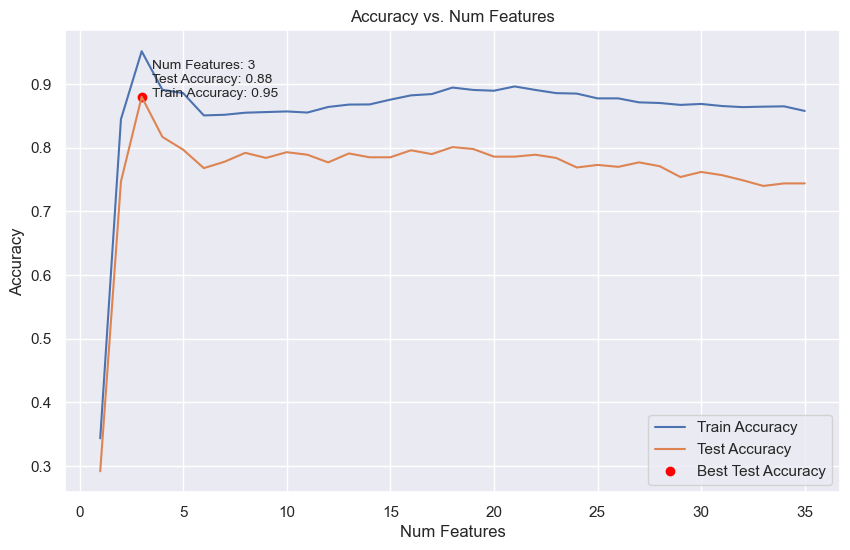

In [136]:
plt.subplots(figsize=(10, 6))
plt.plot(result_gbt['Num Features'], result_gbt['Train Accuracy'], label='Train Accuracy')
plt.plot(result_gbt['Num Features'], result_gbt['Test Accuracy'], label='Test Accuracy')
max_test_score = result_gbt['Test Accuracy'].max()
Num_Features = result_gbt.loc[result_gbt['Test Accuracy'].idxmax(), 'Num Features']
best_train_score = result_gbt.loc[result_gbt['Test Accuracy'].idxmax(), 'Train Accuracy']
plt.scatter(Num_Features, max_test_score, color='red', label='Best Test Accuracy')

plt.annotate(f'Num Features: {Num_Features}\nTest Accuracy: {max_test_score:.2f}\nTrain Accuracy: {best_train_score:.2f}',
             (Num_Features + 0.5, max_test_score), fontsize=10)

plt.xlabel('Num Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Num Features')

plt.legend()

plt.show()

<font color=black size=3 > **3) Importance - Lasso**<br/>
<font color=black size=2 >The Lasso class in scikit-learn is used for L1 regularization, which is a technique for feature selection and regularization in linear regression models. The alpha parameter controls the strength of regularization, with higher values of alpha resulting in more aggressive shrinkage of the coefficient estimates.

In [137]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

feature_importances = lasso.coef_
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X_train.columns[sorted_indices]

result_lasso = pd.DataFrame(columns=['Num Features', 'Features', 'Train Accuracy', 'Test Accuracy'])
knn = KNeighborsClassifier(n_neighbors=3)

for i in range(1, len(sorted_features) + 1):
    np.random.seed(42)
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    # Perform cross-validation and calculate average training and test accuracies
    train_accuracy = cross_val_score(knn, X_train_selected, y_train, cv=5).mean()
    test_accuracy = cross_val_score(knn, X_test_selected, y_test, cv=5).mean()
    result_lasso.loc[i] = [i, ', '.join(selected_features), train_accuracy, test_accuracy]
result_lasso

Num Features                                           Features  \
1              1                                         heart rate   
2              2                              heart rate, h_gyro_ma   
3              3                   heart rate, h_gyro_ma, h_acc_16X   
4              4        heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z   
5              5  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
6              6  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
7              7  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
8              8  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
9              9  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
10            10  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
11            11  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
12            12  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
13            13  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
14            14  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
15            15  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
16            16  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
17            17  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
18            18  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
19            19  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
20            20  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
21            21  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
22            22  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
23            23  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
24            24  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
25            25  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
26            26  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
27            27  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
28            28  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
29            29  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
30            30  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
31            31  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
32            32  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
33            33  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
34            34  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   
35            35  heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h...   

    Train Accuracy  Test Accuracy  
1          0.34375          0.292  
2          0.42375          0.407  
3          0.59050          0.540  
4          0.61375          0.566  
5          0.72575          0.637  
6          0.71550          0.634  
7          0.74075          0.650  
8          0.76975          0.655  
9          0.78125          0.682  
10         0.80700          0.722  
11         0.80175          0.707  
12         0.81600          0.708  
13         0.82150          0.714  
14         0.81775          0.704  
15         0.81375          0.690  
16         0.81675          0.708  
17         0.81200          0.701  
18         0.82350          0.696  
19         0.81725          0.690  
20         0.82000          0.701  
21         0.82050          0.690  
22         0.82075          0.695  
23         0.82700          0.693  
24         0.83575          0.705  
25         0.84675          0.719  
26         0.84750          0.718  
27         0.84500          0.719  
28         0.84875          0.722  
29         0.85400          0.730  
30         0.85550          0.721  
31         0.85450          0.724  
32         0.85400          0.728  
33         0.85475          0.731  
34         0.85375          0.738  
35         0.85775          0.744

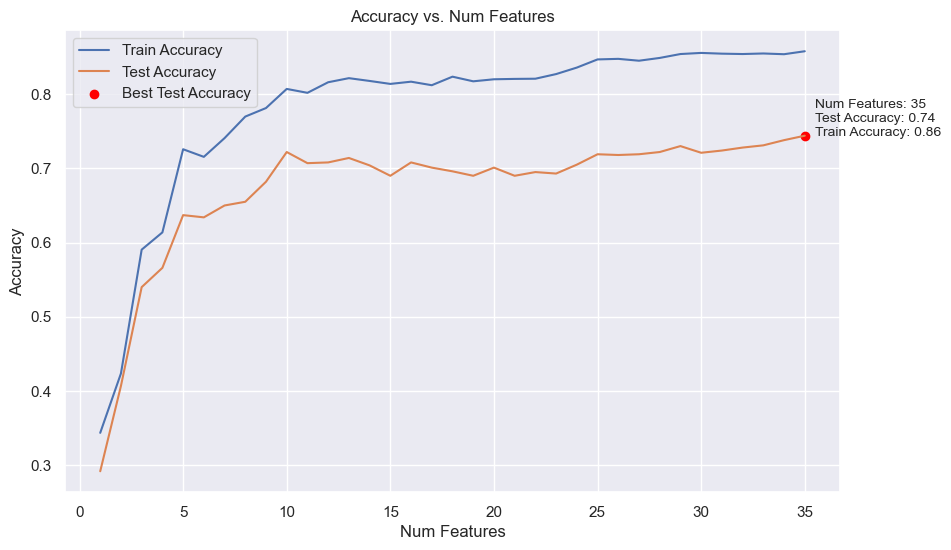

In [138]:
plt.subplots(figsize=(10, 6))
plt.plot(result_lasso['Num Features'], result_lasso['Train Accuracy'], label='Train Accuracy')
plt.plot(result_lasso['Num Features'], result_lasso['Test Accuracy'], label='Test Accuracy')
max_test_score = result_lasso['Test Accuracy'].max()
Num_Features = result_lasso.loc[result_lasso['Test Accuracy'].idxmax(), 'Num Features']
best_train_score = result_lasso.loc[result_lasso['Test Accuracy'].idxmax(), 'Train Accuracy']
plt.scatter(Num_Features, max_test_score, color='red', label='Best Test Accuracy')

plt.annotate(f'Num Features: {Num_Features}\nTest Accuracy: {max_test_score:.2f}\nTrain Accuracy: {best_train_score:.2f}',
             (Num_Features + 0.5, max_test_score), fontsize=10)

plt.xlabel('Num Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Num Features')

plt.legend()

plt.show()

In [139]:
#Choose Num Features=10, because after 10 features, the accuracy increasing slowly.
result_lasso[result_lasso['Num Features'] == 10]['Features'].tolist()

['heart rate, h_gyro_ma, h_acc_16X, a_acc_16Z, h_temp, c_gyro_ma, a_magZ, a_acc_16Y, h_magY, a_temp']

<font color=black size=4 > **2. Hyperparameter tuning**<br/>

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define feature sets
feature_rf = ['heart rate', 'h_temp', 'a_temp']
feature_lasso=['heart rate', 'h_gyro_ma', 'h_acc_16X', 'a_acc_16Z', 'h_temp', 'c_gyro_ma', 'a_magZ', 'a_acc_16Y', 'h_magY', 'a_temp']

features = [feature_rf, feature_lasso]
feature_names = ['feature_rf',  'feature_lasso']

results = pd.DataFrame()
for i, feat in enumerate(features):
    X_train_selected = X_train[feat]
    X_test_selected = X_test[feat]
  # KNN Hyperparameter tuning
    np.random.seed(42)
    knn = KNeighborsClassifier()
    params = {'n_neighbors': list(range(1, 100)),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']}
    grid_search = GridSearchCV(knn, params, cv=5)
    grid_search.fit(X_train_selected, y_train)
    best_params = grid_search.best_params_
    knn_best = KNeighborsClassifier(**best_params)
    knn_best.fit(X_train_selected, y_train)

  # Cross validiation
    train_accuracy = np.mean(cross_val_score(knn_best, X_train_selected, y_train, cv=5))
    test_accuracy = np.mean(cross_val_score(knn_best, X_test_selected, y_test, cv=5))

  # Confusion matrix
    y_train_pred = knn_best.predict(X_train_selected)
    y_test_pred = knn_best.predict(X_test_selected)

    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

  # Save results
    result = pd.DataFrame({'Feature': feature_names[i],
                           'Best Parameters': [best_params],
                           'Train Accuracy': [train_accuracy],
                           'Test Accuracy': [test_accuracy],
                           'Test Confusion Matrix': [test_confusion_matrix]})
    results = pd.concat([results, result])


In [141]:
results

Feature                                    Best Parameters  \
0     feature_rf  {'metric': 'manhattan', 'n_neighbors': 1, 'wei...   
0  feature_lasso  {'metric': 'manhattan', 'n_neighbors': 3, 'wei...   

   Train Accuracy  Test Accuracy  \
0          0.9660          0.921   
0          0.8785          0.798   

                               Test Confusion Matrix  
0  [[78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 81...  
0  [[77, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 81...

In [142]:
results[results['Feature'] == 'feature_rf']['Best Parameters'].tolist()

[{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}]

<font color=black size=4 > **3.  Final Model**<br/>

In [143]:
feature_rf=['heart rate', 'h_temp', 'a_temp']
X_test_rf = X_test[feature_rf]
X_train_rf = X_train[feature_rf]

<font color=black size=3 >**1) Model Evaluation**<br/>

In [147]:
np.random.seed(42)
knn_opt = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights= 'distance')
knn_opt.fit(X_train_rf, y_train)
y_pred_knn_opt = knn_opt.predict(X_test_rf)
report_knn_opt = classification_report(y_test, y_pred_knn_opt)
print(report_knn_opt)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        84
           2       0.98      1.00      0.99        88
           3       1.00      0.99      0.99        82
           4       0.90      0.91      0.91        79
           5       0.98      0.95      0.97        88
           6       0.97      1.00      0.98        84
           7       0.95      0.96      0.96        81
           8       0.96      0.99      0.97        78
           9       1.00      0.99      0.99        86
          10       1.00      1.00      1.00        86
          11       0.94      0.90      0.92        86

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



<font color=black size=3 >**2) Confusion Matrix**<br/>

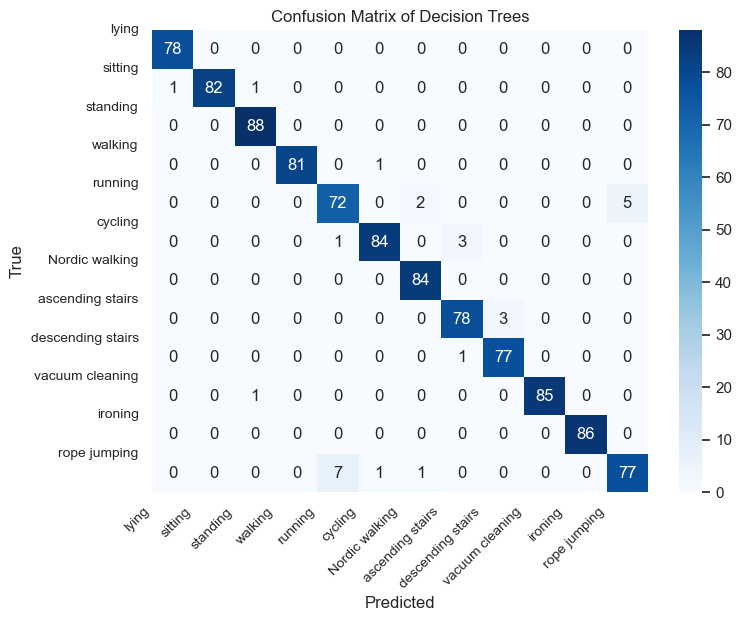

In [148]:
cm_knn_opt= confusion_matrix(y_test,y_pred_knn_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_opt, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 >**3) Check for overfitting and underfitting**<br/>

In [149]:
test_scoreknn_opt = accuracy_score(y_test, knn_opt.predict(X_test_rf)) * 100
train_scoreknn_opt = accuracy_score(y_train, knn_opt.predict(X_train_rf)) * 100

results_learnknn_opt = pd.DataFrame(data=[["KNN-3", train_scoreknn_opt, test_scoreknn_opt]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_learnknn_opt

Model  Training Accuracy %  Testing Accuracy %
0  KNN-3                98.75                97.2

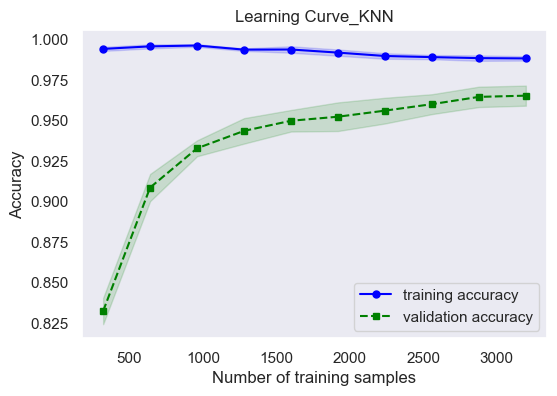

In [150]:
from sklearn.model_selection import learning_curve
np.random.seed(42)
knn_opt = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights= 'distance')
train_sizes, train_scores, test_scores = learning_curve(estimator=knn_opt, X=X_train_rf, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean3 = np.mean(train_scores, axis=1)
train_std3 = np.std(train_scores, axis=1)
test_mean3 = np.mean(test_scores, axis=1)
test_std3 = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean3, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean3 + train_std3, train_mean3 - train_std3, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean3, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean3 + test_std3, test_mean3 - test_std3, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_KNN')
plt.legend(loc='lower right')
plt.show()

<font color=black size=4 >**4.7 Support Vector Machine**<br/> 
    
<font color=black size=4 > **1. Feature Selection**<br/>
<font color=black size=3 > **1) RFE**<br/>
<font color=black size=2 > &emsp; &emsp;Select feature set which 'Num of Features'= 6, 10, 19 to test which one is better, because these 3 points are the stagnation points.

In [152]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
results_svm = []
for num_features in range(1, 39):
    rfe = RFE(estimator=svm, n_features_to_select=num_features)
    X_subset = rfe.fit_transform(X_train, y_train)
    svm.fit(X_subset, y_train)

    train_accuracy = cross_val_score(svm, X_subset, y_train, cv=5).mean()
    test_accuracy = cross_val_score(svm, rfe.transform(X_test), y_test, cv=5).mean()

    features = list(X_train.columns[rfe.support_])

    result = (num_features, features, train_accuracy, test_accuracy)
    results_svm.append(result)

results_svm = pd.DataFrame(results_svm, columns=['Num Features', 'Features', 'Train Accuracy', 'Test Accuracy'])

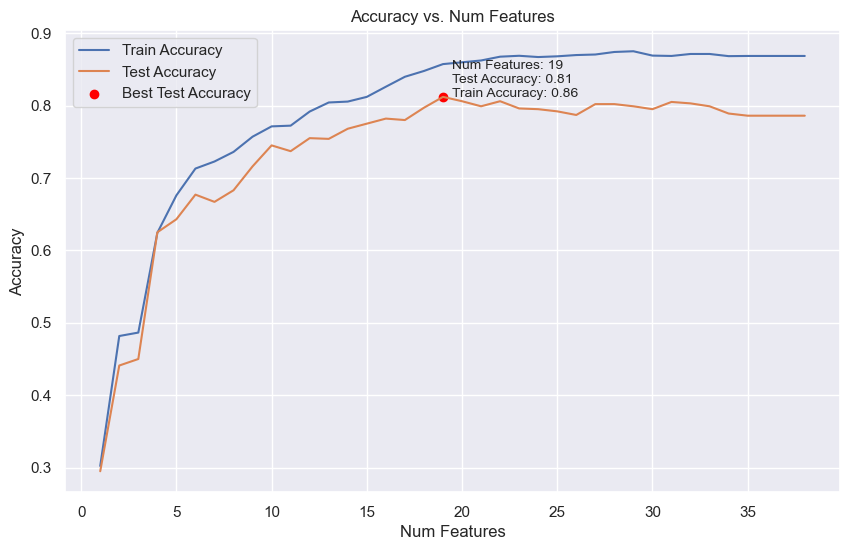

In [154]:
plt.subplots(figsize=(10, 6))
plt.plot(results_svm['Num Features'], results_svm['Train Accuracy'], label='Train Accuracy')
plt.plot(results_svm['Num Features'], results_svm['Test Accuracy'], label='Test Accuracy')
max_test_score = results_svm['Test Accuracy'].max()
Num_Features = results_svm.loc[results_svm['Test Accuracy'].idxmax(), 'Num Features']
best_train_score = results_svm.loc[results_svm['Test Accuracy'].idxmax(), 'Train Accuracy']
plt.scatter(Num_Features, max_test_score, color='red', label='Best Test Accuracy')

plt.annotate(f'Num Features: {Num_Features}\nTest Accuracy: {max_test_score:.2f}\nTrain Accuracy: {best_train_score:.2f}',
             (Num_Features + 0.5, max_test_score), fontsize=10)

plt.xlabel('Num Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Num Features')

plt.legend()

plt.show()


<font color=black size=3 > **2) GradientBoostingTree**<br/>

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train, y_train)

feature_importances = gbt.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X_train.columns[sorted_indices]

result_gbt2 = pd.DataFrame(columns=['Num Features', 'Features', 'Train Accuracy', 'Test Accuracy'])
svm = SVC(kernel='linear', C=1.0, random_state=40)

for i in range(1, len(sorted_features) + 1):
    np.random.seed(42)
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    # Perform cross-validation and calculate average training and test accuracies
    train_accuracy = cross_val_score(svm, X_train_selected, y_train, cv=5).mean()
    test_accuracy = cross_val_score(svm, X_test_selected, y_test, cv=5).mean()

    result_gbt2.loc[i] = [i, ', '.join(selected_features), train_accuracy, test_accuracy]
result_gbt2

Num Features                                           Features  \
1              1                                         heart rate   
2              2                                 heart rate, h_temp   
3              3                         heart rate, h_temp, a_temp   
4              4              heart rate, h_temp, a_temp, c_acc_16Z   
5              5    heart rate, h_temp, a_temp, c_acc_16Z, c_mag_ma   
6              6  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
7              7  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
8              8  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
9              9  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
10            10  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
11            11  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
12            12  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
13            13  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
14            14  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
15            15  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
16            16  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
17            17  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
18            18  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
19            19  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
20            20  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
21            21  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
22            22  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
23            23  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
24            24  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
25            25  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
26            26  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
27            27  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
28            28  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
29            29  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
30            30  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
31            31  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
32            32  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
33            33  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
34            34  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   
35            35  heart rate, h_temp, a_temp, c_acc_16Z, c_mag_m...   

    Train Accuracy  Test Accuracy  
1          0.30225          0.295  
2          0.44900          0.463  
3          0.48650          0.450  
4          0.61200          0.579  
5          0.68450          0.651  
6          0.71825          0.707  
7          0.72750          0.723  
8          0.74450          0.727  
9          0.75000          0.725  
10         0.76825          0.729  
11         0.78075          0.734  
12         0.78975          0.731  
13         0.79350          0.752  
14         0.80700          0.757  
15         0.81200          0.762  
16         0.82725          0.769  
17         0.83650          0.789  
18         0.84550          0.792  
19         0.85100          0.795  
20         0.85175          0.795  
21         0.86100          0.796  
22         0.86150          0.792  
23         0.86150          0.812  
24         0.86625          0.807  
25         0.87525          0.810  
26         0.87125          0.806  
27         0.87175          0.799  
28         0.86650          0.798  
29         0.86425          0.808  
30         0.86300          0.798  
31         0.86625          0.810  
32         0.86375          0.815  
33         0.86475          0.797  
34         0.86575          0.800  
35         0.86850          0.786

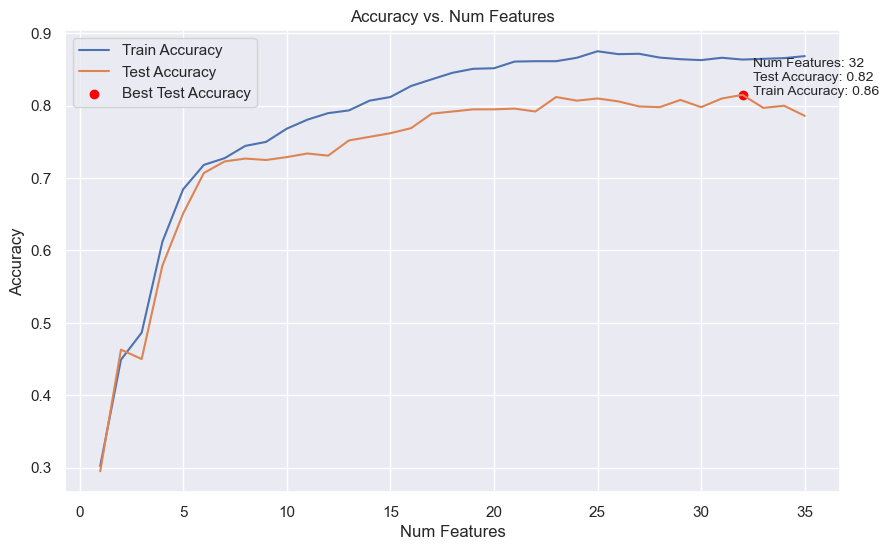

In [156]:
plt.subplots(figsize=(10, 6))
plt.plot(result_gbt2['Num Features'], result_gbt2['Train Accuracy'], label='Train Accuracy')
plt.plot(result_gbt2['Num Features'], result_gbt2['Test Accuracy'], label='Test Accuracy')
max_test_score = result_gbt2['Test Accuracy'].max()
Num_Features = result_gbt2.loc[result_gbt2['Test Accuracy'].idxmax(), 'Num Features']
best_train_score = result_gbt2.loc[result_gbt2['Test Accuracy'].idxmax(), 'Train Accuracy']
plt.scatter(Num_Features, max_test_score, color='red', label='Best Test Accuracy')

plt.annotate(f'Num Features: {Num_Features}\nTest Accuracy: {max_test_score:.2f}\nTrain Accuracy: {best_train_score:.2f}',
             (Num_Features + 0.5, max_test_score), fontsize=10)

plt.xlabel('Num Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Num Features')
plt.legend()
plt.show()

In [ ]:
results_svm[results_svm['Num Features'] == 6]['Features'].tolist()

<font color=black size=4 > **2. Hyperparameter tuning**<br/>

In [162]:
fea6 = ['heart rate', 'h_temp', 'c_acc_16Z', 'c_magY', 'a_temp', 'a_gyro_ma']
fea10 = ['heart rate','h_temp','h_magY','h_magZ', 'c_acc_16Z','c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma']
fea19=['heart rate', 'h_temp', 'a_temp', 'c_acc_16Z', 'c_mag_ma', 'h_acc_16X', 'a_mag_ma', 'h_acc_16Z', 'c_magY', 
       'a_magZ', 'h_gyro_ma',' c_magX', 'h_magY', 'a_gyro_ma', 'c_magZ', 'c_gyroY', 'h_magZ', 'h_acc_16Y', 'c_gyro_ma']

In [8]:
X_train.columns

Index(['heart rate', 'h_temp', 'h_acc_16X', 'h_acc_16Y', 'h_acc_16Z',
       'h_acc_ma', 'h_gyroX', 'h_gyroY', 'h_gyroZ', 'h_gyro_ma', 'h_magX',
       'h_magY', 'h_magZ', 'c_acc_16X', 'c_acc_16Z', 'c_acc_ma', 'c_gyroX',
       'c_gyroY', 'c_gyroZ', 'c_gyro_ma', 'c_magX', 'c_magY', 'c_magZ',
       'c_mag_ma', 'a_temp', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma', 'a_gyro_ma',
       'a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_magY', 'a_magZ', 'a_mag_ma'],
      dtype='object')

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Define feature sets
fea6 = ['heart rate', 'h_temp', 'c_acc_16Z', 'c_magY', 'a_temp', 'a_gyro_ma']
fea10 = ['heart rate','h_temp','h_magY','h_magZ', 'c_acc_16Z','c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma']
fea19=['heart rate', 'h_temp', 'a_temp', 'c_acc_16Z', 'c_mag_ma', 'h_acc_16X', 'a_mag_ma', 'h_acc_16Z', 'c_magY', 
       'a_magZ', 'h_gyro_ma','c_magX', 'h_magY', 'a_gyro_ma', 'c_magZ', 'c_gyroY', 'h_magZ', 'h_acc_16Y', 'c_gyro_ma']

features = [fea6, fea10, fea19]
feature_names = ['fea6', 'fea10', 'fea19']

results_svm = pd.DataFrame()
for i, feat in enumerate(features):
    X_train_selected = X_train[feat]
    X_test_selected = X_test[feat]
    # Hyperparameter tuning
    np.random.seed(42)
    svm = SVC()
    params =  {'C': [0.1 , 1, 3],
             'kernel': ['rbf','sigmoid','poly'],
             'gamma': [0.1, 1, 5, 10],
             'degree': [2, 4, 8]}
    grid_search = GridSearchCV(svm, params, cv=2)
    grid_search.fit(X_train_selected, y_train)
    best_params = grid_search.best_params_
    svm_best = SVC(**best_params)
    svm_best.fit(X_train_selected, y_train)

  # Cross validiation
    train_accuracy = np.mean(cross_val_score(svm_best, X_train_selected, y_train, cv=3))
    test_accuracy = svm_best.score( X_test_selected, y_test)
    
    result = {'Feature': feature_names[i],
              'Best Parameters': best_params,
              'Train Accuracy': train_accuracy,
              'Test Accuracy': test_accuracy}
    
    results_svm = results_svm.append(result, ignore_index=True)
    
    # results_svm = pd.concat([results_svm, result], ignore_index=True)
    #results_svm = pd.concat([results_svm, pd.DataFrame(result)], ignore_index=True)
    
    print(f"Feature Set: {feature_names[i]}")
    print("Best Parameters:", best_params)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("\n")


  # Save results
#     results_svm = pd.DataFrame({'Feature': feature_names[i],
#                            'Best Parameters': [best_params],
#                            'Train Accuracy': [train_accuracy],
#                            'Test Accuracy': [test_accuracy]})

C:\Users\the force\AppData\Local\Temp\ipykernel_14100\1889322409.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_svm = results_svm.append(result, ignore_index=True)


Feature Set: fea6
Best Parameters: {'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Train Accuracy: 0.8702518583169031
Test Accuracy: 0.885




C:\Users\the force\AppData\Local\Temp\ipykernel_14100\1889322409.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_svm = results_svm.append(result, ignore_index=True)


Feature Set: fea10
Best Parameters: {'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Train Accuracy: 0.8800009222695478
Test Accuracy: 0.907


Feature Set: fea19
Best Parameters: {'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Train Accuracy: 0.9337523661275139
Test Accuracy: 0.952




C:\Users\the force\AppData\Local\Temp\ipykernel_14100\1889322409.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_svm = results_svm.append(result, ignore_index=True)


In [26]:

results_svm 

Feature                                    Best Parameters  Train Accuracy  \
0    fea6  {'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'r...        0.870252   
1   fea10  {'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'r...        0.880001   
2   fea19  {'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': ...        0.933752   

   Test Accuracy  
0          0.885  
1          0.907  
2          0.952

C: The regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error on the training data. Higher values of C allow more misclassifications on the training data, potentially leading to overfitting. Lower values make the model more tolerant to misclassifications, which can improve generalization. Common range: [0.1, 1, 10].

kernel: The type of kernel used for the decision function. Common options include:

'linear': Linear kernel.
'poly': Polynomial kernel.
'rbf' (Radial Basis Function): Gaussian kernel.
'sigmoid': Sigmoid kernel.
gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. A small gamma value means a large influence of the training samples, while a large gamma value means a smaller influence, resulting in a more local influence. Common range: [0.1, 1, 10].

degree: Degree of the polynomial kernel function for 'poly' kernels. It's ignored by all other kernels. Common values: [2, 3, 4, 5].

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Define feature sets
fea6 = ['heart rate', 'h_temp', 'c_acc_16Z', 'c_magY', 'a_temp', 'a_gyro_ma']
fea10 = ['heart rate','h_temp','h_magY','h_magZ', 'c_acc_16Z','c_magY','c_magZ','c_mag_ma','a_temp','a_gyro_ma']
fea19=['heart rate', 'h_temp', 'a_temp', 'c_acc_16Z', 'c_mag_ma', 'h_acc_16X', 'a_mag_ma', 'h_acc_16Z', 'c_magY', 
       'a_magZ', 'h_gyro_ma','c_magX', 'h_magY', 'a_gyro_ma', 'c_magZ', 'c_gyroY', 'h_magZ', 'h_acc_16Y', 'c_gyro_ma']

features = [fea6, fea10, fea19]
feature_set_names= ['fea6', 'fea10', 'fea19']


results = []

for i, feat in enumerate(features):
    X_train_selected = X_train[feat]
    X_test_selected = X_test[feat]
    
    svc_model = SVC()
    cv_scores = cross_val_score(svc_model, X_train_selected, y_train, cv=5)  # 5-fold cross-validation
    results.append({
        'Feature Set': feature_set_names[i],
        'CV Training Accuracy Mean': np.mean(cv_scores),
        'CV Training Accuracy Std': np.std(cv_scores),
    })


    svc_model.fit(X_train_selected, y_train)
    test_accuracy = svc_model.score( X_test_selected, y_test)
    results[i]['Test Accuracy'] = test_accuracy

results_svm = pd.DataFrame(results)


In [12]:
results_svm

Feature Set  CV Training Accuracy Mean  CV Training Accuracy Std  \
0        fea6                    0.78975                  0.007133   
1       fea10                    0.84950                  0.007098   
2       fea19                    0.90525                  0.008193   

   Test Accuracy  
0          0.786  
1          0.843  
2          0.922

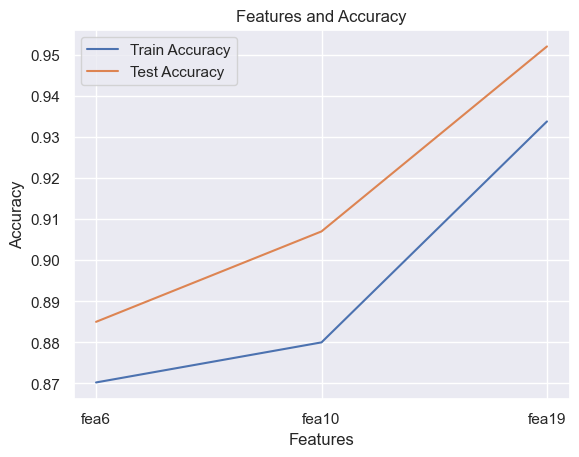

In [27]:
plt.plot(results_svm['Feature'], results_svm['Train Accuracy'],label='Train Accuracy')
plt.plot(results_svm['Feature'], results_svm['Test Accuracy'],label='Test Accuracy')

plt.title('Features and Accuracy')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<font color=black size=4 > **3. Model with 19 Features**<br/>
<font color=black size=2 >  Too much features cause the overfit based on the learning curve.

In [28]:
X_test3 = X_test[fea19]
X_train3 = X_train[fea19]
X_train3

heart rate   h_temp  a_temp  c_acc_16Z  c_mag_ma  h_acc_16X  a_mag_ma  \
976      -0.8926  1.07400  0.4970    0.73340  -1.25300    -0.6514   -0.7817   
4567     -1.4940  0.85550  0.2185    2.50800   0.14940     0.9204   -1.0690   
1388     -0.4922  0.04462 -0.2834    0.19870   1.57400     0.8360    1.9795   
431      -0.9260  0.85550  0.8315   -0.33940  -0.34640     0.1521   -0.1815   
2251      0.5430  0.29420  0.9440    0.09515  -0.03357    -0.2950   -1.3870   
...          ...      ...     ...        ...       ...        ...       ...   
1452     -0.1583  0.82400  0.3857   -0.16030  -0.31150    -1.6750   -0.0648   
1813      1.6780  0.38800  0.2185    0.01326  -0.19580    -2.1880    0.1265   
3902      0.9100 -0.39230  0.2742   -1.10450   1.25000    -3.5620    0.9320   
366      -0.2585  0.76200  0.7200   -0.05790  -1.02200     0.3215   -1.8260   
4022     -0.4922 -1.26600 -2.6820   -0.23820   1.59300     0.2668    2.6110   

      h_acc_16Z  c_magY  a_magZ  h_gyro_ma  c_magX  h_magY  a_gyro_ma  \
976    0.109250  0.2434  0.9620    -0.9863 -0.5460  0.1659    -0.7940   
4567   0.843800  2.0660 -1.0810    -1.0070  1.9290  0.8920    -0.7940   
1388  -0.971000 -1.4770 -3.6720    -0.7153  1.3310 -1.9460    -0.7817   
431    1.688000 -0.4220 -0.9023    -0.4807 -0.6826  0.8800    -0.7590   
2251   0.462200 -0.3180 -1.6140     0.9873  1.0630 -0.0597     2.4960   
...         ...     ...     ...        ...     ...     ...        ...   
1452   0.000753 -0.3354  0.6455     1.6820 -0.3032 -0.8100     0.4912   
1813   0.612000 -0.4830  0.5874     2.1560 -0.8086 -1.1690     0.4734   
3902   1.213000 -1.5330 -0.1241     0.6790  0.4740 -0.4320     0.9130   
366    1.303000  0.2563 -0.3710     0.1998  0.6400  1.6740    -0.5874   
4022   0.670000 -0.9260 -3.6560    -0.8154 -0.6030 -2.1400    -0.7725   

       c_magZ   c_gyroY    h_magZ  h_acc_16Y  c_gyro_ma  
976  -0.25880 -0.051820  1.350000    -0.0240    -0.9136  
4567 -1.59600 -0.002373 -0.504400     0.7340    -0.9980  
1388  0.29540  0.007614  0.616000     1.0940    -0.8574  
431  -0.28800 -0.647000 -1.643000    -1.4795    -0.2218  
2251 -0.00943  0.594000  0.005352     0.2087     0.5630  
...       ...       ...       ...        ...        ...  
1452 -1.04000 -0.750500  0.557000     1.1840    -0.2032  
1813 -0.63700  3.530000 -0.147600     3.2010     2.9920  
3902 -0.89360 -0.183100 -0.579600     1.3950     0.6170  
366  -0.48000 -0.500500 -0.109200    -0.8480     0.6187  
4022  1.69300 -0.134500  1.285000     0.7380    -0.7640  

[4000 rows x 19 columns]

In [29]:
results_svm[results_svm['Feature'] == 'fea19']['Best Parameters'].tolist()

[{'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}]

<font color=black size=3 >**1) Model Evaluation**<br/>

In [51]:
svm_opt = SVC(C=1, gamma=0.1, kernel='poly')
svm_opt.fit(X_train3, y_train)
y_pred_svm_opt = svm_opt.predict(X_test3)
report_svm_opt = classification_report(y_test, y_pred_svm_opt)

cross_train_accuracy = np.mean(cross_val_score(svm_opt, X_train3, y_train, cv=5))
cross_test_accuracy = np.mean(cross_val_score(svm_opt, X_test3, y_test, cv=5))

print(f"Cross Test Accuracy: {cross_test_accuracy}")
print(f"Cross Train Accuracy: {cross_train_accuracy}")
print(report_svm_opt)

Cross Test Accuracy: 0.8379999999999999
Cross Train Accuracy: 0.9025000000000001
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.99      0.95      0.97        84
           2       0.94      0.99      0.96        88
           3       0.78      0.91      0.84        82
           4       0.95      0.91      0.93        79
           5       0.96      0.99      0.97        88
           6       0.95      0.88      0.91        84
           7       0.90      0.86      0.88        81
           8       0.84      0.82      0.83        78
           9       0.89      0.84      0.86        86
          10       0.95      0.98      0.97        86
          11       0.99      0.98      0.98        86

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.93      1000
weighted avg       0.93      0.93      0.93      1000



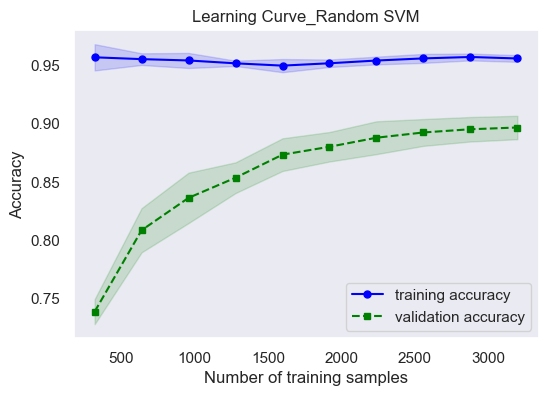

In [53]:
from sklearn.model_selection import learning_curve
svm_opt = SVC(C=1, gamma=0.1,degree= 2, kernel='poly')
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_opt, X=X_train3, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean_svm = np.mean(train_scores, axis=1)
train_std_svm = np.std(train_scores, axis=1)
test_mean_svm = np.mean(test_scores, axis=1)
test_std_svm = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean_svm, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean_svm + train_std_svm, train_mean_svm - train_std_svm, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean_svm, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean_svm + test_std_svm, test_mean_svm - test_std_svm, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_Random SVM')
plt.legend(loc='lower right')
plt.show()

<font color=black size=4 > **4. Final Model with 10 features**<br/>

In [36]:
X_test4 = X_test[fea10]
X_train4 = X_train[fea10]
X_train4

heart rate   h_temp  h_magY    h_magZ  c_acc_16Z  c_magY   c_magZ  \
976      -0.8926  1.07400  0.1659  1.350000    0.73340  0.2434 -0.25880   
4567     -1.4940  0.85550  0.8920 -0.504400    2.50800  2.0660 -1.59600   
1388     -0.4922  0.04462 -1.9460  0.616000    0.19870 -1.4770  0.29540   
431      -0.9260  0.85550  0.8800 -1.643000   -0.33940 -0.4220 -0.28800   
2251      0.5430  0.29420 -0.0597  0.005352    0.09515 -0.3180 -0.00943   
...          ...      ...     ...       ...        ...     ...      ...   
1452     -0.1583  0.82400 -0.8100  0.557000   -0.16030 -0.3354 -1.04000   
1813      1.6780  0.38800 -1.1690 -0.147600    0.01326 -0.4830 -0.63700   
3902      0.9100 -0.39230 -0.4320 -0.579600   -1.10450 -1.5330 -0.89360   
366      -0.2585  0.76200  1.6740 -0.109200   -0.05790  0.2563 -0.48000   
4022     -0.4922 -1.26600 -2.1400  1.285000   -0.23820 -0.9260  1.69300   

      c_mag_ma  a_temp  a_gyro_ma  
976   -1.25300  0.4970    -0.7940  
4567   0.14940  0.2185    -0.7940  
1388   1.57400 -0.2834    -0.7817  
431   -0.34640  0.8315    -0.7590  
2251  -0.03357  0.9440     2.4960  
...        ...     ...        ...  
1452  -0.31150  0.3857     0.4912  
1813  -0.19580  0.2185     0.4734  
3902   1.25000  0.2742     0.9130  
366   -1.02200  0.7200    -0.5874  
4022   1.59300 -2.6820    -0.7725  

[4000 rows x 10 columns]

In [37]:
results_svm[results_svm['Feature'] == 'fea10']['Best Parameters'].tolist()

[{'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}]

<font color=black size=3 >**1) Model Evaluation**<br/>

In [54]:
svm_opt = SVC(C=1, gamma=0.1,degree= 2, kernel='poly')
svm_opt.fit(X_train4, y_train)
y_pred_svm_opt = svm_opt.predict(X_test4)
report_svm_opt = classification_report(y_test, y_pred_svm_opt)

cross_train_accuracy = np.mean(cross_val_score(svm_opt, X_train4, y_train, cv=5))
cross_test_accuracy = np.mean(cross_val_score(svm_opt, X_test4, y_test, cv=5))

print(f"Cross Test Accuracy: {cross_test_accuracy}")
print(f"Cross Train Accuracy: {cross_train_accuracy}")
print(report_svm_opt)

Cross Test Accuracy: 0.6940000000000001
Cross Train Accuracy: 0.80525
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.95      0.95      0.95        84
           2       0.82      0.99      0.90        88
           3       0.56      0.87      0.68        82
           4       0.83      0.76      0.79        79
           5       0.93      0.93      0.93        88
           6       0.81      0.85      0.83        84
           7       0.54      0.54      0.54        81
           8       0.57      0.27      0.37        78
           9       0.79      0.71      0.75        86
          10       0.91      0.91      0.91        86
          11       0.96      0.87      0.91        86

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.79      1000
weighted avg       0.81      0.81      0.80      1000



<font color=black size=3 >**2) Confusion Matrix**<br/>

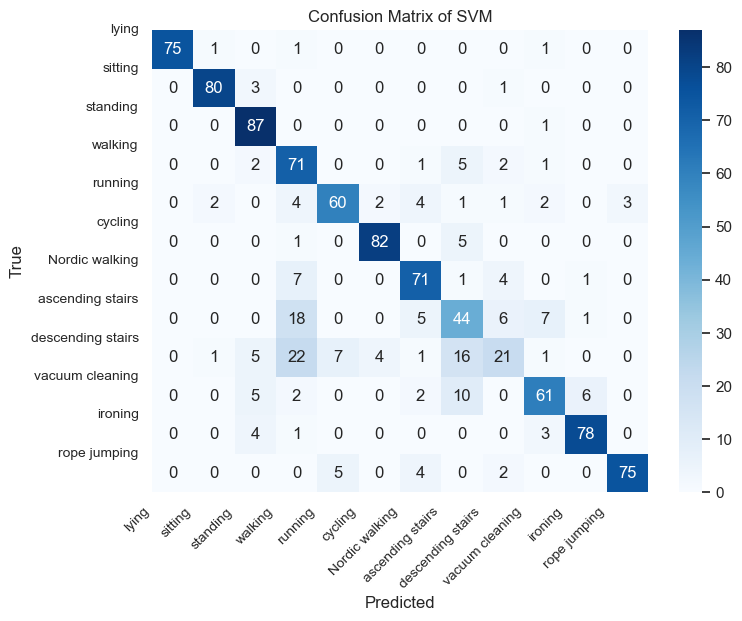

In [55]:
cm_svm_opt= confusion_matrix(y_test,y_pred_svm_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_opt, annot=True, cmap='Blues', fmt='d')
class_names = ['lying', 'sitting','standing',  'walking', 'running', 'cycling','Nordic walking', 'ascending stairs','descending stairs',   'vacuum cleaning', 'ironing', 'rope jumping' ]
plt.title('Confusion Matrix of SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, fontsize=10, rotation=0)
plt.show()

<font color=black size=3 >**3) Check for overfitting and underfitting**<br/>

In [56]:
test_scoresvm_opt = accuracy_score(y_test, svm_opt.predict(X_test4)) * 100
train_scoresvm_opt = accuracy_score(y_train, svm_opt.predict(X_train4)) * 100

results_learnsvm_opt = pd.DataFrame(data=[["Random Forest", train_scoresvm_opt, test_scoresvm_opt]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_learnsvm_opt

Model  Training Accuracy %  Testing Accuracy %
0  Random Forest               83.325                80.5

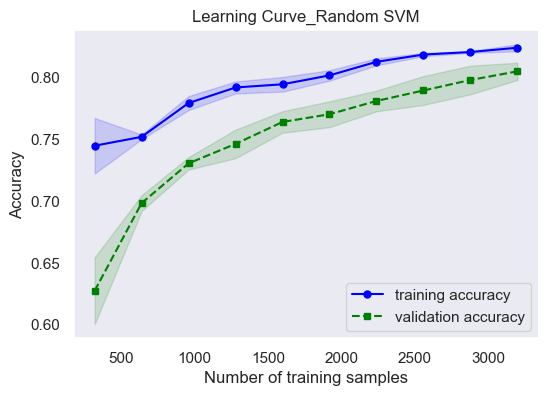

In [57]:
from sklearn.model_selection import learning_curve
svm_opt = SVC(C=1, gamma=0.1,degree= 2, kernel='poly')
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_opt, X=X_train4, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=1)
train_mean_svm = np.mean(train_scores, axis=1)
train_std_svm = np.std(train_scores, axis=1)
test_mean_svm = np.mean(test_scores, axis=1)
test_std_svm = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))

plt.plot(train_sizes, train_mean_svm, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean_svm + train_std_svm, train_mean_svm - train_std_svm, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean_svm, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean_svm + test_std_svm, test_mean_svm - test_std_svm, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve_Random SVM')
plt.legend(loc='lower right')
plt.show()